# Importing Libraries and Reading the File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as m
from sklearn.decomposition import PCA

from sklearn.metrics import (classification_report,
                             confusion_matrix, 
                             accuracy_score, 
                             f1_score,
                             roc_auc_score,
                             precision_recall_curve,
                             roc_curve)
from sklearn import metrics

from IPython.display import Markdown,display

pd.options.display.max_rows = 300
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore') #ignore warnings

In [2]:
telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
dictionary = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [5]:
dictionary[:]

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


There are 99999 entries with 226 attributes

# Find High Valued Customer(HVC)

In [7]:
# Calculation of Data Recharge (new KPI)
telecom['data_rech_6'] = telecom['av_rech_amt_data_6'] * (telecom['count_rech_2g_6'] + telecom['count_rech_3g_6'])
telecom['data_rech_7'] = telecom['av_rech_amt_data_7'] * (telecom['count_rech_2g_7'] + telecom['count_rech_3g_7'])

# if data recharge amount is not present then we assume that it is zero.
telecom['data_rech_6'] = telecom['data_rech_6'].fillna(0)
telecom['data_rech_7'] = telecom['data_rech_7'].fillna(0)


In [8]:
# similarly calculating for month 8, it is not needed for now
telecom['data_rech_8'] = telecom['av_rech_amt_data_8'] * (telecom['count_rech_2g_8'] + telecom['count_rech_3g_8'])
telecom['data_rech_8'] = telecom['data_rech_8'].fillna(0)

In [9]:
telecom['average_recharge_amount_good_phase'] =  0.5 * (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] + telecom['data_rech_6'] + telecom['data_rech_7'])
threshold = np.percentile(telecom['average_recharge_amount_good_phase'], 70)
HVC=telecom[telecom['average_recharge_amount_good_phase'] >= threshold]

In [10]:
HVC.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,data_rech_6,data_rech_7,data_rech_8,average_recharge_amount_good_phase
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,

In [11]:
HVC.shape

(30001, 230)

There are total 30001 rows

# Calculating Churn

Those who haven't made any calls (incoming and outgoing) and haven't consumed mobile data in the churn phase

In [12]:
chrunCondition = lambda x: 1 if x.total_ic_mou_9 == 0 and x.total_og_mou_9 == 0 and x.vol_2g_mb_9 == 0 and x.vol_3g_mb_9 == 0 else 0
HVC['churn'] = HVC.apply(chrunCondition, axis=1).astype("category")

# Removing few Irrelevant Columns

In [13]:
#Removing columns for the month of september as per the Business objective

In [14]:
churn_phase_attributes_9 = HVC.columns.to_series().filter(regex='sep|_9$')
HVC = HVC.drop(churn_phase_attributes_9, axis=1)

In [15]:
# Removing column Mobile Number, Circle ID
HVC = HVC.drop(['mobile_number', 'circle_id'], axis=1)

In [16]:
# Removing columns showing average recharge or count of recharge , as it has been already taken into account earlier.
HVC = HVC.drop(["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","count_rech_2g_6", "count_rech_2g_7", 
                "count_rech_2g_8","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8"], axis = 1)

# Data Understanding

In [17]:
HVC.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,data_rech_6,data_rech_7,data_rech_8,average_recharge_amount_good_phase,churn
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1
7,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN

In [18]:
HVC.shape

(30001, 165)

There are 30001 rows and 165 attributes

In [19]:
HVC.dtypes

loc_og_t2o_mou                         float64
std_og_t2o_mou                         float64
loc_ic_t2o_mou                         float64
last_date_of_month_6                    object
last_date_of_month_7                    object
last_date_of_month_8                    object
arpu_6                                 float64
arpu_7                                 float64
arpu_8                                 float64
onnet_mou_6                            float64
onnet_mou_7                            float64
onnet_mou_8                            float64
offnet_mou_6                           float64
offnet_mou_7                           float64
offnet_mou_8                           float64
roam_ic_mou_6                          float64
roam_ic_mou_7                          float64
roam_ic_mou_8                          float64
roam_og_mou_6                          float64
roam_og_mou_7                          float64
roam_og_mou_8                          float64
loc_og_t2t_mo

Few of the Columns seems to have wrong data types as per the Data Dictionary:
    [last_date_of_month_6, last_date_of_month_7, last_date_of_month_8,date_of_last_rech_6 ,date_of_last_rech_7 ,
     date_of_last_rech_8,date_of_last_rech_data_6 , date_of_last_rech_data_7,date_of_last_rech_data_8] - These should be of date data type
    [night_pck_user_6, night_pck_user_7,night_pck_user_8] - binary attribute as per data dictionary
    [fb_user_6,fb_user_7,fb_user_8] - binary attribute as per dictionary
#[last_date_of_month_6, last_date_of_month_7, last_date_of_month_8] - These three seems to be of no use , so we can drop them

In [20]:
# Dropping [last_date_of_month_6, last_date_of_month_7, last_date_of_month_8]
HVC = HVC.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'],axis=1)

In [21]:
HVC.shape

(30001, 162)

There are 30001 rows and 162 columns

In [22]:
# Correcting the datetime column
date_attributes = HVC.columns.to_series().filter(regex='date')
for attri in date_attributes:
    HVC[attri] = pd.to_datetime(HVC[attri])

In [23]:
binary_attributes = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
binary_attributes

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [24]:
for attri in binary_attributes:
    # filling 0 as absent of feature
    HVC[attri] = HVC[attri].fillna(0).astype(np.int32).astype('category')

# Recheck the data types

In [25]:
HVC.dtypes

loc_og_t2o_mou                               float64
std_og_t2o_mou                               float64
loc_ic_t2o_mou                               float64
arpu_6                                       float64
arpu_7                                       float64
arpu_8                                       float64
onnet_mou_6                                  float64
onnet_mou_7                                  float64
onnet_mou_8                                  float64
offnet_mou_6                                 float64
offnet_mou_7                                 float64
offnet_mou_8                                 float64
roam_ic_mou_6                                float64
roam_ic_mou_7                                float64
roam_ic_mou_8                                float64
roam_og_mou_6                                float64
roam_og_mou_7                                float64
roam_og_mou_8                                float64
loc_og_t2t_mou_6                             f

# Performing EDA

In [26]:
# Finding the percentage of churn rate 
churn_rate = HVC['churn'].astype(np.int).mean()*100
print(round(churn_rate,2))

8.14


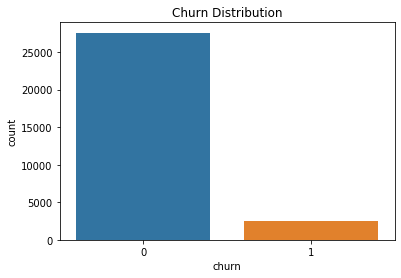

In [27]:
# Churn Distribution 
plt.figure()
plt.title('Churn Distribution')
sns.countplot(x='churn',data=HVC)
plt.show()

In [28]:
Markdown(">`{churn_count}` customers have been churned out of `{total}`.".format(churn_count=HVC['churn'].astype(np.int32).sum(), total=HVC.shape[0]))

>`2441` customers have been churned out of `30001`.

# Analysis of Numerical Columns

In [29]:
# Method to show the distribution , will use it to see the distribution of different numeric columns
def univariate_num(attributes, figsize=(12,32)):
    
    # description of numeric columns
    display(HVC[attributes].describe(percentiles=[.25, .50, .75,.95, .99, .1]))

    # visual analysis
    
    ## rows and columns of graph grid (r x c)
    r = math.ceil(len(attributes) / 3)
    c = min(len(attributes), 3)
    
    plt.figure(figsize=figsize)
    plt.title("Distribution Analysis")
    
    i = 1
    for attribute in attributes:
        try:
            plt.subplot(r, c, i)
            sns.distplot(HVC[attribute], kde=False)
            i += 1
        except:
            pass
    plt.subplots_adjust(hspace=0.5, right=1)
    plt.tight_layout()
    plt.show()

In [30]:
columns_numeric = HVC.select_dtypes([np.number]).columns.to_series()
Markdown("There are `{length}` numeric columns.".format(length=len(columns_numeric)))

There are `149` numeric columns.

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7
count,29777.0,29777.0,29777.0,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000
mean,0.0,0.0,0.0,558.490824,560.782203,508.597957,265.618262,272.700470,243.646938,380.608111,384.994337,348.723294,16.408431,12.872921,13.009645,27.063178,20.519370,20.674656,86.047905,87.235755,81.256858,166.263652,165.980922,157.937216,6.461494,6.540759,6.126112,1.604247,1.924320,1.777295,258.781428,259.765948,245.328371,168.954534,177.409496,154.486547,182.753296,191.345743,163.758261,1.836917,1.859332,1.649273,0.0,0.0,0.0,353.548540,370.618355,319.897555,2.211703,2.144122
std,0.0,0.0,0.0,460.640461,479.776947,501.961981,462.493645,482.972367,465.200856,484.257474,500.807874,486.918550,76.973057,76.454034,75.575865,117.218920,96.933381,106.751862,230.609510,242.427257,231.399901,251.423301,242.754684,236.315181,22.310305,22.125961,19.858510,6.357757,9.238487,7.345047,380.226723,377.227177,367.505268,406.914141,424.347895,404.426554,412.056950,436.816512,416.088724,12.087212,13.095663,11.147419,0.0,0.0,0.0,612.382663,643.696568,618.022200,46.273483,45.957517
min,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.0,0.0,0.0,171.605000,177.886000,84.000000,1.645000,1.400000,0.650000,16.620000,15.560000,9.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.360000,2.630000,0.646000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.785000,5.366000,1.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,309.865000,309.826000,231.473000,19.240000,18.155000,14.255000,78.575000,76.040000,58.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.030000,5.280000,3.830000,21.137500,22.910000,17.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.987500,37.740000,29.635000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.710000,0.480000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,481.694000,480.943000,427.585000,88.060000,86.885000,72.930000,229.635000,227.120000,197.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.580000,25.780000,23.240000,80.240000,81.685000,74.540000,0.110000,0.210000,0.000000,0.000000,0.000000,0.000000,129.350000,132.730000,120.860000,3.360000,3.300000,1.430000,18.185000,17

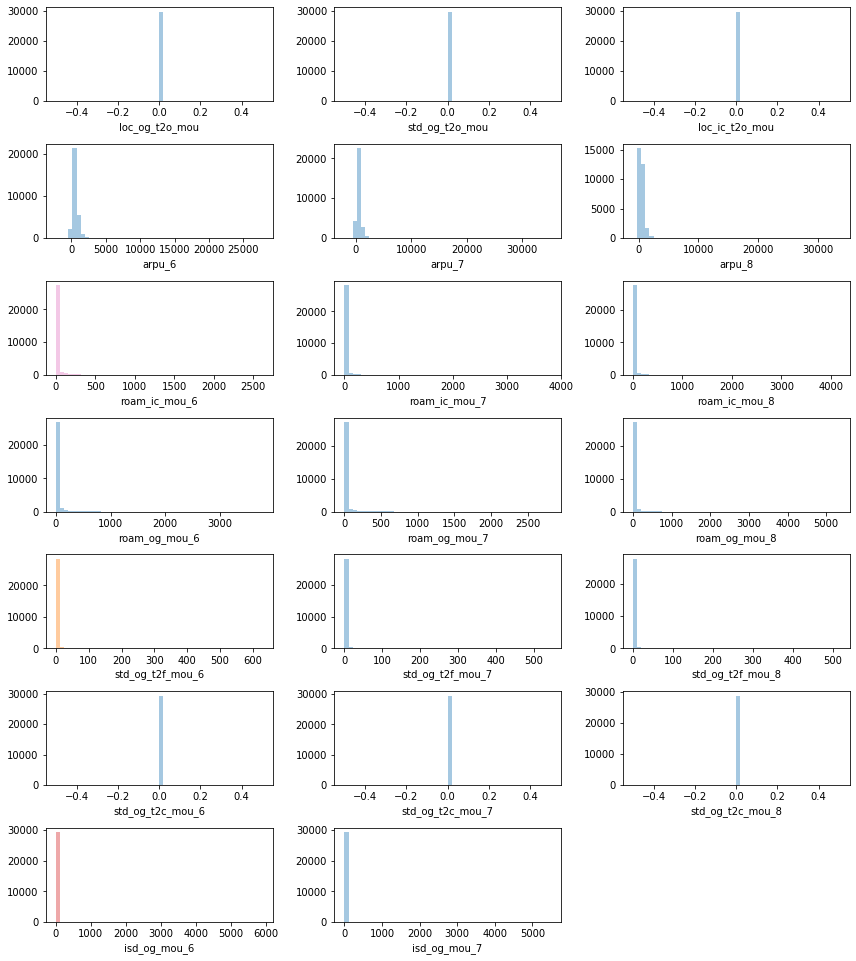

In [31]:
# first 50 columns
univariate_num(columns_numeric[:50])

As we can see in the graph, the columns:- "loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "std_og_t2c_mou_6",
"std_og_t2c_mou_7", and "std_og_t2c_mou_8" , do not show any variations, so we can delete these columns.

,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6
count,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000
mean,5.925921,7.238206,6.824251,0.673323,0.043687,0.059953,609.866251,628.366047,551.678812,66.664313,67.851431,65.169653,153.195349,154.388675,152.188163,15.561152,16.327824,14.989754,235.430623,238.577812,232.357291,15.170365,15.702570,14.480350,29.735390,31.384277,29.059765,2.745734,2.849447,2.666308,0.0,0.0,0.0,47.655140,49.940010,46.209942,289.950496,296.756987,279.922931,0.062165,0.020125,0.027649,10.984229,12.09224,11.446169,1.174790,1.527682,1.274322,11.851005
std,17.711012,21.964629,20.677329,4.144797,2.701071,3.381939,690.873430,717.219171,700.478180,165.002284,168.678411,161.602601,220.251819,219.252313,217.137562,46.125606,49.563887,44.078609,316.131788,317.260100,311.154100,78.384516,83.769752,72.720335,99.033833,106.540374,105.268386,19.272265,19.687849,20.291213,0.0,0.0,0.0,138.618986,149.355854,141.316476,365.523475,373.747232,361.175175,0.189605,0.183489,0.112796,77.421743,80.89052,71.988368,14.113843,16.141140,13.038515,9.429132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.760000,10.080000,0.210000,0.680000,0.910000,0.400000,7.390000,9.133000,5.896000,0.000000,0.000000,0.000000,13.985000,17.060000,10.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,18.190000,22.210000,6.250000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.580000,116.490000,72.360000,6.830000,7.560000,6.380000,30.590000,33.340000,29.540000,0.000000,0.000000,0.000000,51.337500,56.337500,48.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.330000,1.330000,0.850000,72.880000,78.990000,61.360000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.310000,0.810000,0.660000,0.000000,0.000000,0.000000,410.630000,425.590000,333.540000,26.030000,26.660000,24.760000,86.760000,88.370000,85.790000,2.010000,2.160000,2.010000,138.630000,141.790000,137.590000,0.480000,0.550000,0.280000,5.340000,5.540000,4.410000,0.000000,0.000000,0.000000,0.0,0.0,0.0,11.980000,12.740000,10.540000,183.730000,187.580000,173.110000,0.000

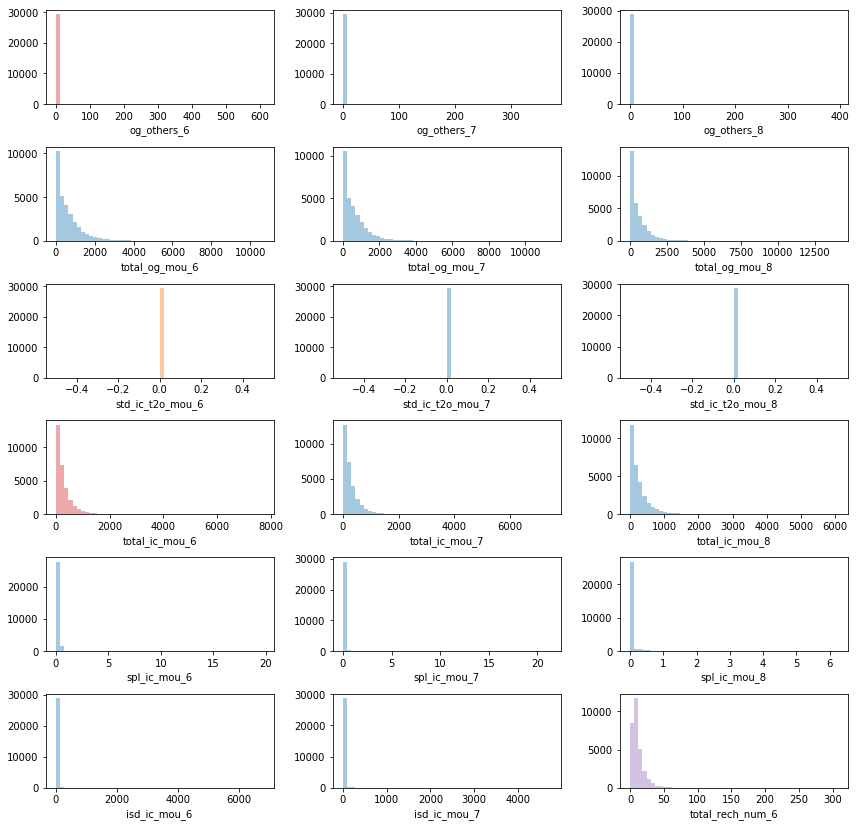

In [32]:
# 51 to 100 columns
univariate_num(columns_numeric[51:100])

As we can see in the graph, the columns:- "og_others_6", "og_others_7", "og_others_8" ,"std_ic_t2o_mou_6","std_ic_t2o_mou_7",
"std_ic_t2o_mou_8" , do not show any variations, so we can delete these columns.

,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,data_rech_6,data_rech_7,data_rech_8,average_recharge_amount_good_phase
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,9.972868,660.732342,660.498017,584.365454,169.284824,172.201727,160.144462,100.893604,100.356021,92.393654,2.985975,3.260597,3.050147,139.798580,140.431143,136.329217,126.522185,125.097326,105.913072,344.258568,370.196701,351.493998,119.974696,120.695809,118.050972,113.585859,113.801227,109.817427,0.174494,0.183261,0.153628,1.066064,1.214026,1.054865,0.217759,0.229026,0.211026,0.209393,0.227492,0.202393,1209.368754,169.138860,178.872765,158.523962,455.777166,528.233732,463.252944,1152.620628
std,9.274370,561.032865,582.430876,611.245907,175.315958,181.390742,173.207799,143.737572,140.925669,145.182324,3.227379,3.496721,3.538953,118.851784,120.247247,119.531924,330.530793,331.548010,313.384838,913.747778,915.525911,919.021056,226.092738,229.575385,218.941369,201.792701,206.066861,195.348610,0.434953,0.450423,0.406486,2.507197,2.736158,2.535940,0.613199,0.659125,0.617549,0.985674,1.089929,1.100107,957.677989,420.974354,443.544138,416.734860,1418.671074,1476.036563,1622.766035,1358.713982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.280000,-26.040000,-24.490000,-15.320000,-15.480000,-24.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000
10%,2.000000,195.000000,192.000000,56.000000,37.000000,36.000000,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.000000,23.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,284.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000
25%,4.000000,360.000000,352.000000,250.000000,110.000000,110.000000,50.000000,25.000000,20.000000,0.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,603.000000
50%,8.000000,566.000000,562.000000,490.000000,120.000000,128.000000,130.000000,67.000000,50.000000,50.000000,2.000000,2.000000,2.000000,152.000000,152.000000,152.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,15.480000,12.950000,10.020000,26.915000,24.000000,19.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

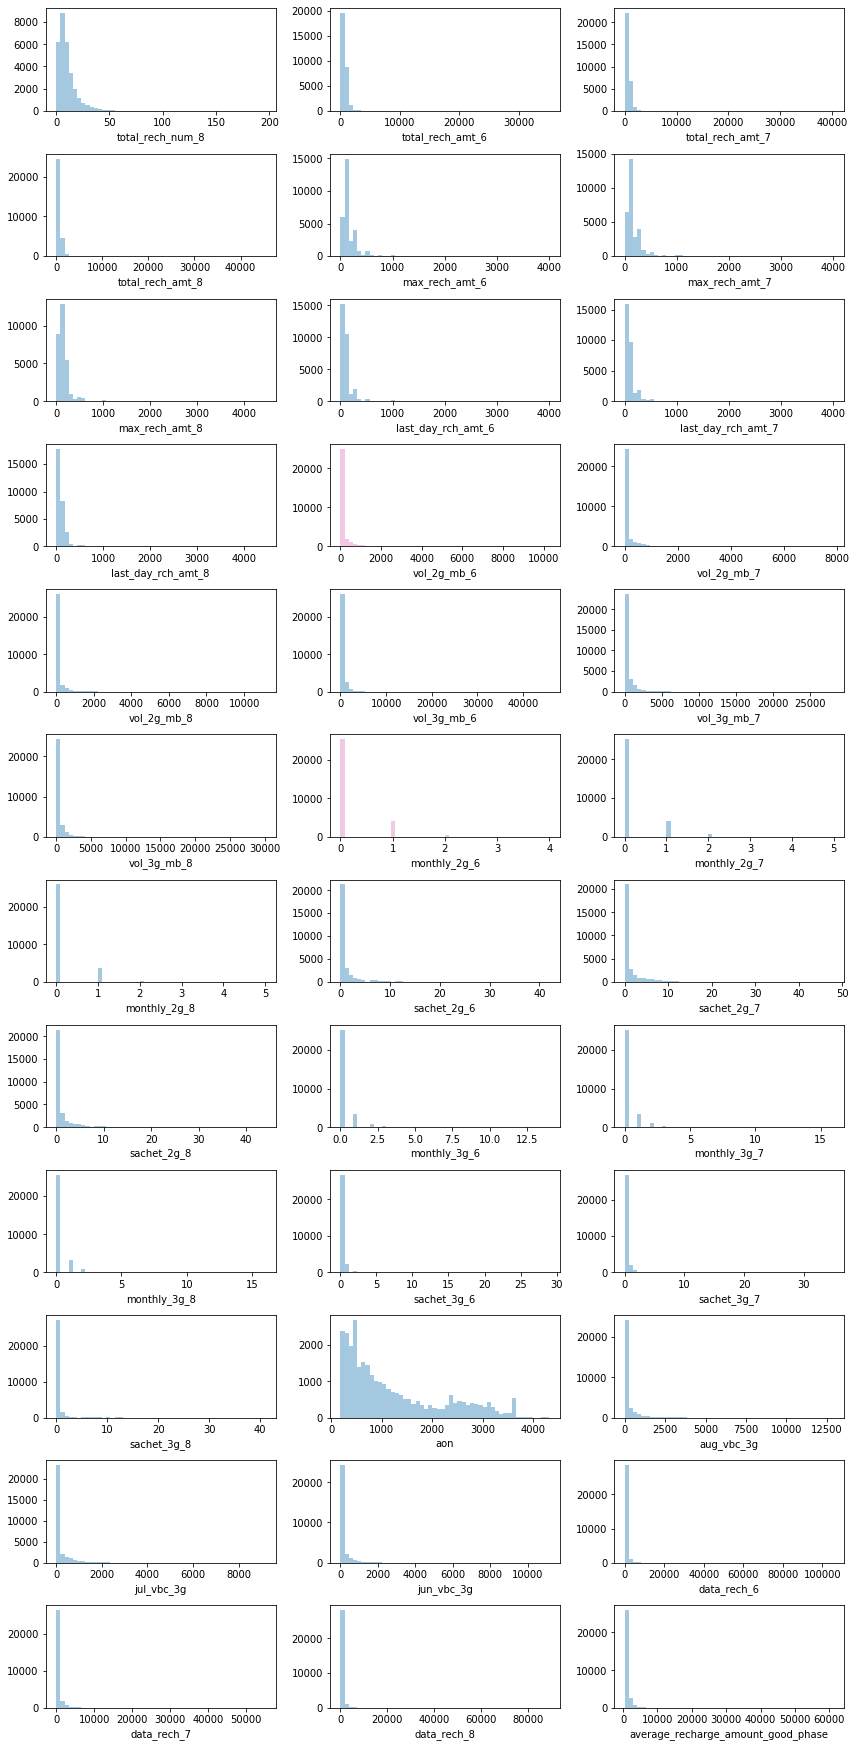

In [33]:
# now the remaining ones 101st to last
univariate_num(columns_numeric[101:])

# Categorical Columns Analysis except churn

In [34]:
# Method to analyze categorical column distirbution
def categorical_univariate(atributes, figsize=(20, 15)):
    r = math.ceil(len(atributes) / 3)
    c = min(len(atributes), 3)
    plt.figure(figsize=figsize)
    plt.title("frequency distribution")

    for i, attribute in enumerate(atributes,1):
        plt.subplot(r, c, i)
        counts = HVC[attribute].value_counts()
        ax = sns.barplot(counts.index, counts.values)
        ax.set_xlabel(attribute)
    plt.subplots_adjust(hspace=0.5, right=1)
    plt.tight_layout()
    plt.show()

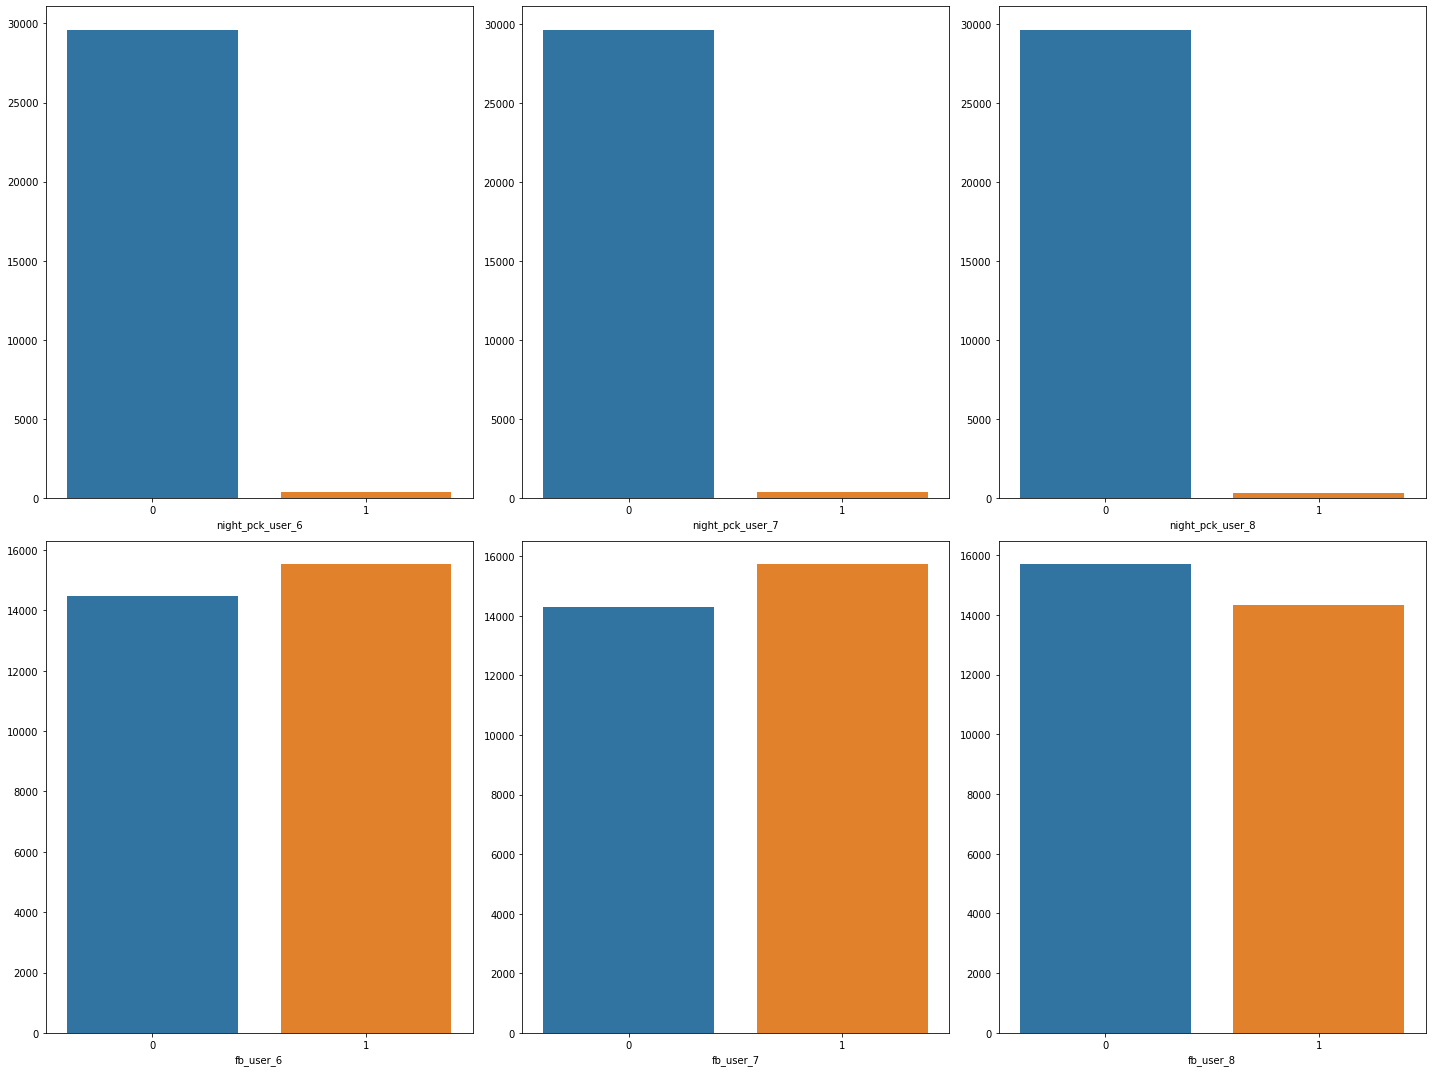

In [35]:
# categorical attributes 
categorical_columns = HVC.select_dtypes(include=['category','object']).columns.to_series()
# categorical columns excpet churn column
categorical_univariate(categorical_columns.drop('churn'))

We can see from the graph that night pack users are very less

# Missing Value Analysis and Treatment

In [36]:
# Method to calculate missing %
def percentage_missing():
    na_data_all = HVC.isna().mean() * 100
    na_data_all = na_data_all.drop(na_data_all[na_data_all == 0].index).sort_values(ascending=False)
    return pd.DataFrame({'Missing value %' :na_data_all})

In [37]:
percentage_missing()

,Missing value %
arpu_2g_8,46.825106
max_rech_data_8,46.825106
total_rech_data_8,46.825106
date_of_last_rech_data_8,46.825106
arpu_3g_8,46.825106
date_of_last_rech_data_6,44.148528
max_rech_data_6,44.148528
arpu_2g_6,44.148528
arpu_3g_6,44.148528
total_rech_data_6,44.148528


# Imputing Missing Values

In [38]:
# Method to provide given kpi's all months attributes names
def get_kpi_attributes_names(attribute):
    return [attribute+'_6', attribute + '_7', attribute+'_8']

In [39]:
# filling na with zero
fill_na = get_kpi_attributes_names('total_rech_data') + get_kpi_attributes_names('ic_others')  + get_kpi_attributes_names('max_rech_data')

for feature in fill_na:
    HVC[feature] = HVC[feature].fillna(0)

In [40]:
# fill na with arbitrary value - columns are: date_of_last_rech_data and date_of_last_rech
date_of_last_rech_kpi = get_kpi_attributes_names('date_of_last_rech_data')
reference_date = pd.to_datetime('2014-05-31')
HVC[date_of_last_rech_kpi] = HVC[date_of_last_rech_kpi].fillna(reference_date)

date_of_last_rech_kpi = get_kpi_attributes_names('date_of_last_rech')
HVC[date_of_last_rech_kpi] = HVC[date_of_last_rech_kpi].fillna(reference_date)

In [41]:
# imputing with Median values. Columns are :'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'
features = [
            'arpu_3g_6',
            'arpu_3g_7',
            'arpu_3g_8',
            'arpu_2g_6',
            'arpu_2g_7',
            'arpu_2g_8'
            ]

HVC[features] = HVC[features].fillna(HVC[features].median())

In [42]:
features = percentage_missing().index.tolist()
HVC[features] = HVC[features].fillna(HVC[features].median())

In [43]:
percentage_missing()

,Missing value %


# Feature Engineering

New features introduction by composing or removing existing features.

Removing Zero Variation features

In [44]:
no_variation_features = ["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "std_og_t2c_mou_6", "std_og_t2c_mou_7", 
                         "std_og_t2c_mou_8", "og_others_6", "og_others_7", "og_others_8" ,"std_ic_t2o_mou_6","std_ic_t2o_mou_7", 
                         "std_ic_t2o_mou_8"]

HVC = HVC.drop(no_variation_features, axis=1)


Finding the Last Recharge and adding new column. And we will calculate this by subtracting with reference date i.e (01-09-2014)

In [45]:
reference_date = pd.to_datetime('2014-09-01') 

# extract day from date 
day = lambda x: x.days

diff_rech_6 = (reference_date - HVC['date_of_last_rech_6'])
diff_rech_7 =  (reference_date - HVC['date_of_last_rech_7'])
diff_rech_8 = (reference_date - HVC['date_of_last_rech_8'])

# Find the minimum days
HVC['last_rech'] = diff_rech_6.combine(diff_rech_7, min).combine(diff_rech_8, min).apply(day)

In [46]:
# Last Recharge Data
diff_rech_data_6 = (reference_date - HVC['date_of_last_rech_data_6'])
diff_rech_data_7 =  (reference_date - HVC['date_of_last_rech_data_7'])
diff_rech_data_8 = (reference_date - HVC['date_of_last_rech_data_8'])

# Finding the minimum days
HVC['last_rech_data'] = diff_rech_data_6.combine(diff_rech_data_7, min).combine(diff_rech_data_8, min).apply(day)

In [47]:
# Removing date_of_last_rech and date_of_last_rech_data for all the months
HVC = HVC.drop(get_kpi_attributes_names('date_of_last_rech') + get_kpi_attributes_names('date_of_last_rech_data'), axis=1)

Voice Call Usage Type (NEW KPI)

Binning the user based upon call usage.

Inactive : if customer has not used both incoming and outgoing.
Active_IC : if customer has used incoming only.
Active_OG : if customer has used outgoing only.
Active_all: if customer has use both incoming and outgoing.

In [48]:
# Features to store type of user using voice calls for each month
HVC["voice_call_usage_type_6"] = HVC.apply(lambda x: "Inactive" if x.total_og_mou_6 == x.total_ic_mou_6 == 0 else
                                            "Active_IC" if (x.total_og_mou_6 > 0 and x.total_ic_mou_6 == 0) else
                                            "Active_OG" if (x.total_ic_mou_6 > 0 and x.total_og_mou_6 == 0) else
                                            "Active_all", axis=1).astype("category")

HVC["voice_call_usage_type_7"] = HVC.apply(lambda x:"Inactive" if x.total_og_mou_7 == x.total_ic_mou_7 == 0 else
                                            "Active_IC" if (x.total_og_mou_7 > 0 and x.total_ic_mou_7 == 0) else
                                            "Active_OG" if (x.total_ic_mou_7 > 0 and x.total_og_mou_7 == 0) else
                                            "Active_all", axis=1).astype("category")

HVC["voice_call_usage_type_8"] = HVC.apply(lambda x:"Inactive" if x.total_og_mou_8 == x.total_ic_mou_8 == 0 else
                                         "Active_IC" if (x.total_og_mou_8 > 0 and x.total_ic_mou_8 == 0) else
                                         "Active_OG" if (x.total_ic_mou_8 > 0 and x.total_og_mou_8 == 0) else
                                         "Active_all", axis=1).astype("category")

KPI Difference : 
Average Good Phase - Action Phase

Renaming Attributes:
vbc_3g kpi's , which are prefixed by month abbreviations: jun, jul, aug

In [49]:
HVC = HVC.rename(columns={"jun_vbc_3g": "vbc_3g_6", "jul_vbc_3g": "vbc_3g_7", 'aug_vbc_3g': 'vbc_3g_8'})

In [50]:
# list of numeric KPI
numeric_kpis = [ 'arpu', 'arpu_2g', 'arpu_3g','data_rech', 'ic_others', 'isd_ic_mou', 'isd_og_mou', 
              'last_day_rch_amt', 'loc_ic_mou','loc_ic_t2f_mou', 'loc_ic_t2m_mou', 'loc_ic_t2t_mou', 
              'loc_og_mou', 'loc_og_t2c_mou', 'loc_og_t2f_mou', 'loc_og_t2m_mou', 'loc_og_t2t_mou', 
              'max_rech_amt', 'offnet_mou', 'onnet_mou', 'roam_ic_mou', 'roam_og_mou', 'spl_ic_mou', 
              'spl_og_mou', 'std_ic_mou','std_ic_t2f_mou', 'std_ic_t2m_mou', 'std_ic_t2t_mou', 
              'std_og_mou', 'std_og_t2f_mou','std_og_t2m_mou', 'std_og_t2t_mou', 'total_ic_mou', 
              'total_og_mou', 'total_rech_amt', 'total_rech_num', 'vbc_3g', 'vol_2g_mb','vol_3g_mb',
              'max_rech_data', 'monthly_2g', 'monthly_3g', 'sachet_2g', 'sachet_3g', 'total_rech_data'
             ]


# list of categorical KPI
cat_kpis = ['fb_user', 'night_pck_user','voice_call_usage_type']

for kpi in numeric_kpis:
    feature_name='diff_'+ kpi
    HVC[feature_name] = (0.5 * (HVC[kpi+'_6'] + HVC[kpi+'_7']) - HVC[kpi+'_8']) **2 

Data KPI Difference
Combining 2G+3G data KPI difference as other difference.

In [51]:
# for vol attributes
difference = lambda x: ((x.vol_2g_mb_8 + x.vol_3g_mb_8) - (0.5 * (x.vol_2g_mb_6 + x.vol_3g_mb_6 + x.vol_2g_mb_7 + x.vol_3g_mb_7)))**2
HVC["diff_total_data"] = HVC.apply(difference, axis=1)

# for arpu attributes
difference = lambda x: ((x.arpu_2g_8 + x.arpu_3g_8) - (0.5*(x.arpu_2g_6 + x.arpu_3g_6 + x.arpu_2g_7 + x.arpu_3g_7)))**2
HVC["diff_arpu_data"] = HVC.apply(difference, axis=1)

In [52]:
# removing standalone differences
HVC = HVC.drop(['diff_vol_3g_mb', 'diff_vol_2g_mb', 'diff_arpu_2g', 'diff_arpu_3g'], axis=1)

# update diff list
delete_kpis_for_diff = ['vol_2g_mb', 'vol_3g_mb', 'arpu_2g', 'arpu_3g']
diff_kpis = list(filter(lambda i: i not in delete_kpis_for_diff , numeric_kpis))
diff_kpis += ['total_data', 'arpu_data']

Onnet Offnet difference for Good Phase 

In [53]:
difference_Good = lambda x: ((x.onnet_mou_6 + x.onnet_mou_7) - (x.offnet_mou_6 + x.offnet_mou_7)) ** 2
HVC["good_phase_onnet_offnet_difference"] = HVC.apply(difference_Good, axis=1)

Onnet Offnet difference for Action Phase

In [54]:
difference_Action = lambda x: (x.onnet_mou_8 - x.offnet_mou_8) ** 2
HVC["action_phase_onnet_offnet_difference"] = HVC.apply(difference_Action, axis=1)

Recharge Type for Good phase

In [55]:
HVC["good_phase_avg_rech_type"] = pd.cut(0.5*(HVC["total_rech_amt_6"] +HVC["total_rech_amt_7"] +HVC['data_rech_6'] + 
                                              HVC['data_rech_7']),bins=[-0.001, 100, 250, 500, 1000, 50000],
                                              labels=['low', 'low_medium', 'medium', 'high', 'higher'])

Recharge Type for Action phase

In [56]:
HVC["action_phase_rech_type"] = pd.cut((HVC["total_rech_amt_8"] +HVC["data_rech_8"]),bins=[-0.001, 100, 250, 500, 1000, 50000],
                                              labels=['low', 'low_medium', 'medium', 'high', 'higher'])

In [57]:
Markdown('''There are `{feature_count}` features.'''.format(feature_count=HVC.shape[1]))

There are `196` features.

# Outliers Removal

With Outliers: The count of observations is 30001 and Churn Rate is 8.14.

In [58]:
# numeric attributes
numeric_attributes = HVC.select_dtypes([np.number]).columns.tolist()
HVC[numeric_attributes].describe([.01, .25, .5, .75, .99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,data_rech_6,data_rech_7,data_rech_8,average_recharge_amount_good_phase,last_rech,last_rech_data,diff_arpu,diff_data_rech,diff_ic_others,diff_isd_ic_mou,diff_isd_og_mou,diff_last_day_rch_amt,diff_loc_ic_mou,diff_loc_ic_t2f_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2t_mou,diff_loc_og_mou,diff_loc_og_t2c_mou,diff_loc_og_t2f_mou,diff_loc_og_t2m_mou,diff_loc_og_t2t_mou,diff_max_rech_amt,diff_offnet_mou,diff_onnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_spl_ic_mou,diff_spl_og_mou,diff_std_ic_mou,diff_std_ic_t2f_mou,diff_std_ic_t2m_mou,diff_std_ic_t2t_mou,diff_std_og_mou,diff_std_og_t2f_mou,diff_std_og_t2m_mou,diff_std_og_t2t_mou,diff_total_ic_mou,diff_total_og_mou,diff_total_rech_amt,diff_total_rech_num,diff_vbc_3g,diff_max_rech_data,diff_monthly_2g,diff_monthly_3g,diff_sachet_2g,diff_sachet_3g,diff_total_rech_data,diff_total_data,diff_arpu_data,good_phase_onnet_offnet_difference,action_phase_onnet_offnet_difference
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3

a) Select data points less than  μ  +  4σ  (Keeping 99.9% data points)
b) Select features if number of data points which are not selected is less than 25
c) Remove the outlier data points from the feature.

In [59]:
for attribute in numeric_attributes:
    std = HVC[attribute].std()
    upper_lim = HVC[attribute].mean() + 4 * std

    outlier_filter = HVC[attribute].apply(lambda x: x <= upper_lim )
    
    diff = HVC.shape[0] - sum(outlier_filter)
    
    
    # Features with less than 25 outliers detected by the range were removed.
    if diff < 25:
        HVC = HVC[outlier_filter]

In [60]:
churn_rate = (HVC['churn'] == 1).mean() * 100
Markdown("**After Removing Outliers**: the count of observations is `{}` and Churn Rate is `{}`.".format(HVC.shape[0], '%.2f' % churn_rate))

**After Removing Outliers**: the count of observations is `29946` and Churn Rate is `8.14`.

In [61]:
HVC.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,data_rech_6,data_rech_7,data_rech_8,average_recharge_amount_good_phase,churn,last_rech,last_rech_data,voice_call_usage_type_6,voice_call_usage_type_7,voice_call_usage_type_8,diff_arpu,diff_data_rech,diff_ic_others,diff_isd_ic_mou,diff_isd_og_mou,diff_last_day_rch_amt,diff_loc_ic_mou,diff_loc_ic_t2f_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2t_mou,diff_loc_og_mou,diff_loc_og_t2c_mou,diff_loc_og_t2f_mou,diff_loc_og_t2m_mou,diff_loc_og_t2t_mou,diff_max_rech_amt,diff_offnet_mou,diff_onnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_spl_ic_mou,diff_spl_og_mou,diff_std_ic_mou,diff_std_ic_t2f_mou,diff_std_ic_t2m_mou,diff_std_ic_t2t_mou,diff_std_og_mou,diff_std_og_t2f_mou,diff_std_og_t2m_mou,diff_std_og_t2t_mou,diff_total_ic_mou,diff_total_og_mou,diff_total_rech_amt,diff_total_rech_num,diff_vbc_3g,diff_max_rech_data,diff_monthly_2g,diff_monthly_3g,diff_sachet_2g,diff_sachet_3g,diff_total_rech_data,diff_total_data,diff_arpu_data,good_phase_onnet_offnet_difference,action_phase_onnet_offnet_difference,good_phase_avg_rech_type,action_phase_rech_type
0,197.385,214.816,213.803,88.06,86.885,0.00,229.635,227.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.58,25.78,0.00,80.24,81.685,0.00,0.11,0.21,0.00,0.0,0.0,0.00,129.35,132.73,0.00,3.36,3.30,0.00,18.185,17.75,0.00,0.00,0.00,0.00,50.795,50.035,0.00,0.0,0.00,0.00,0.31,0.81,0.00,0.00,0.00,0.00,26.03,26.66,0.16,86.76,88.37,4.13,2.01,2.16,1.15,138.63,141.79,5.44,0.48,0.55,0.00,5.34,5.54,0.00,0.00,0.00,0.00,11.98,12.74,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.170,212.17,212.17,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1,24,24,Inactive,Inactive,Active_OG,5.932851e+01,0.0,0.000000,0.000000,0.000000,0.00,18162.952900,0.874225,6961.399225,685.654225,17171.481600,0.0000,0.025600,6554.926406,659.462400,0.00,52156.282506,7651.438256,0.0000,0.000000,0.000000,0.3136,152.769600,0.00000

# Analysis For Churn

KPI vs Churn over period of time

In [62]:
 # Method to draw monthwise variation of given numeric sigle kpi
def month_kpi_churn(kpi, estimator):
    
    attributes = ['churn'] + get_kpi_attributes_names(kpi)
    
    # shaping data 
    df=HVC[attributes].groupby('churn').agg(estimator)
    df = pd.melt(df.reset_index(), id_vars=['churn'], var_name=['months'], value_name=kpi)
    df['months']=df['months'].apply(lambda name: name[-1])

    graph=sns.lineplot(x="months", y=kpi,
                  hue="churn",
                    data=df,legend= False)
    
    # to highlight action phase
    plt.axvspan(1,2, facecolor='#ef5350', alpha=0.3)
    return graph

In [63]:
# Method to draw monthwise variation of given numeric multiple KPIs
def kpis_churn(kpis, estimator='median'):
    r = math.ceil(len(kpis) / 3)
    c = min(len(kpis), 3)
    
    fig=plt.figure(figsize=(c*3.5, 3*r))
    
    axes=[]
    for i, kpi in enumerate(kpis,1):
        
        plt.subplot(r, c, i)
        axes.append(month_kpi_churn(kpi, estimator))
    
    # for common legend
    fig.legend(axes,     
           labels=['no', 'yes'],   
           loc="left top",   
           borderaxespad=0.2,    
           title="churn?" )
    
    plt.subplots_adjust(hspace=0.5, right=1)
    plt.tight_layout()
    plt.show()

In [64]:
Markdown("There are `{kpis_count}` KPIs with `{kpis_attributes}` attributes".format(kpis_count=len(numeric_kpis), kpis_attributes=3 * len(numeric_kpis)))

There are `45` KPIs with `135` attributes

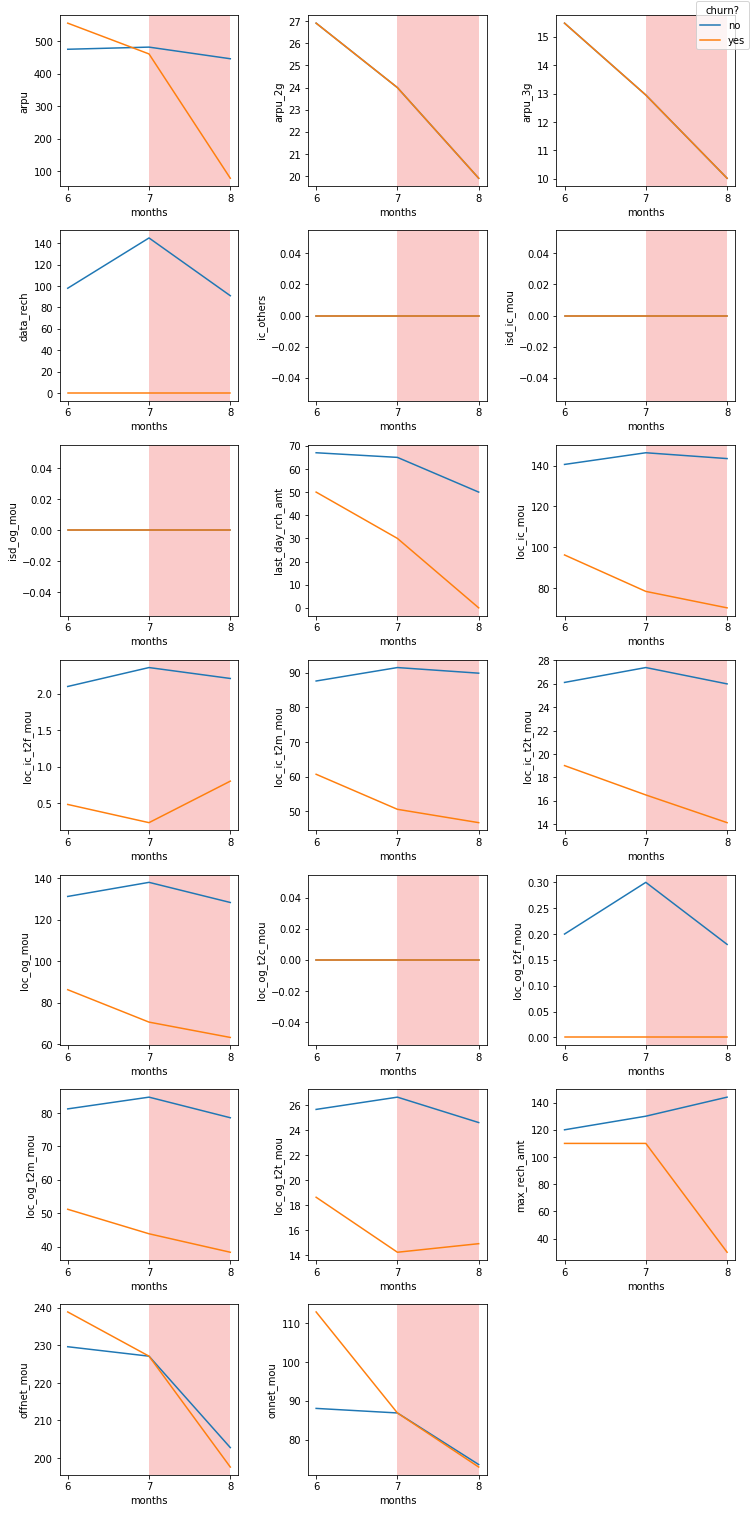

In [65]:
# first 20 KPIs
kpis_churn(numeric_kpis[:20], 'median')

From the above plot we can say that, "isd_ic_mou", "ic_others", "isd_og_mou", and "loc_og_t2c_mou" 
do not impact churning of customers. So we can delete these KPIs

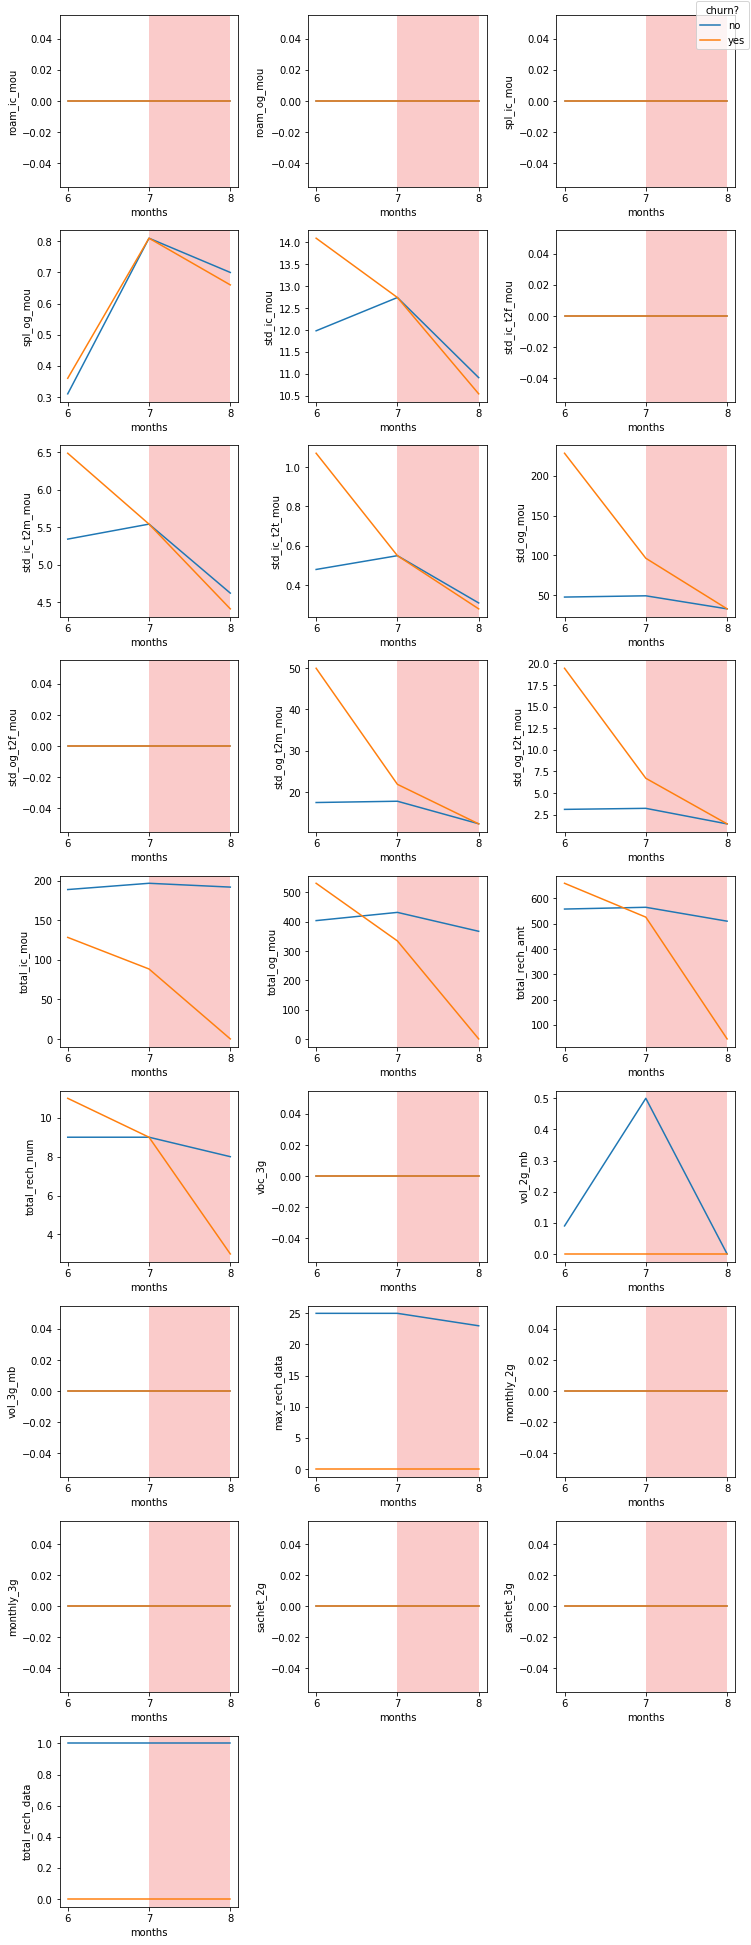

In [66]:
# 21st to the last KPIs
kpis_churn(numeric_kpis[20:], 'median')

From the above plots we can say that "roam_ic_mou", "roam_og_mou", "spl_ic_mou", "std_ic_t2f_mou", "std_og_t2f_mou", "vbc_3g", 
"vol_3g_mb", "monthly_2g", "monthly_3g", "sachet_2g" and "sachet_3g" do not impact churning customers. 
So we can delete these KPIs

In [67]:
# delete non impacting KPIs
impactless_kpis = ['roam_ic_mou', 'roam_og_mou', 'loc_og_t2c_mou', 'std_og_t2f_mou', 'isd_og_mou',
                      'std_ic_t2f_mou', 'isd_og_mou', 'std_ic_t2f_mou', 'spl_ic_mou', 'isd_ic_mou', 
                      'ic_others', 'vol_3g_mb', 'vbc_3g', 'monthly_2g', 'monthly_3g', 'sachet_2g','sachet_3g' ]

# collecting KPIs attributes
kpis_attributes = []
for kpi in impactless_kpis:
    kpis_attributes += get_kpi_attributes_names(kpi)

HVC = HVC.drop(kpis_attributes, axis=1)

# updating numeric KPIs
numeric_kpis = list(filter(lambda i: i not in impactless_kpis , numeric_kpis))

# Categorical KPI Against Churn

In [68]:
# Method to plot categorical KPIs against churn
def categorical_kpi_churn(kpi):
    attributes = get_kpi_attributes_names(kpi)
#     print(attributes)
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for variable, subplot in zip(attributes, ax.flatten()):
        sns.countplot(x=variable, hue="churn", data=HVC, ax=subplot)
        subplot.set_yscale("log")
        subplot.set_ylabel("Count")
        subplot.set_xlabel(variable)
    plt.tight_layout()
    plt.show()

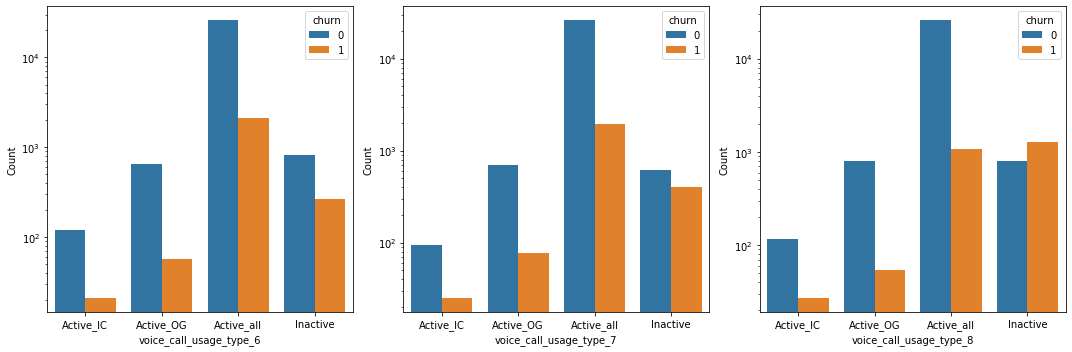

In [69]:
categorical_kpi_churn('voice_call_usage_type')

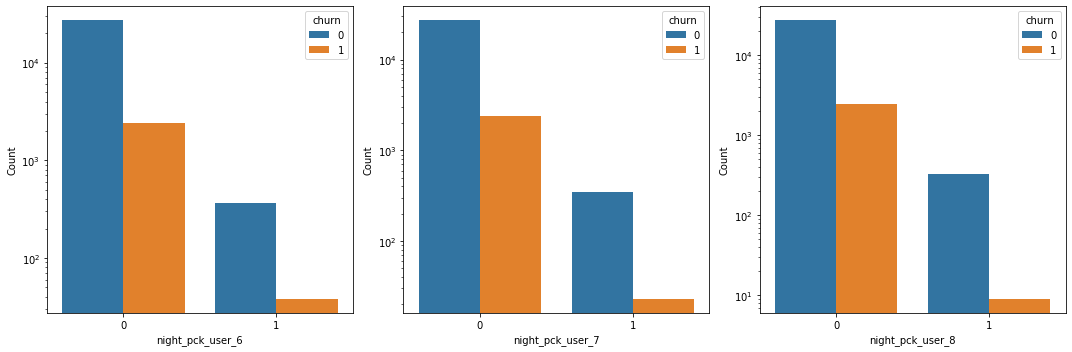

In [70]:
categorical_kpi_churn('night_pck_user')

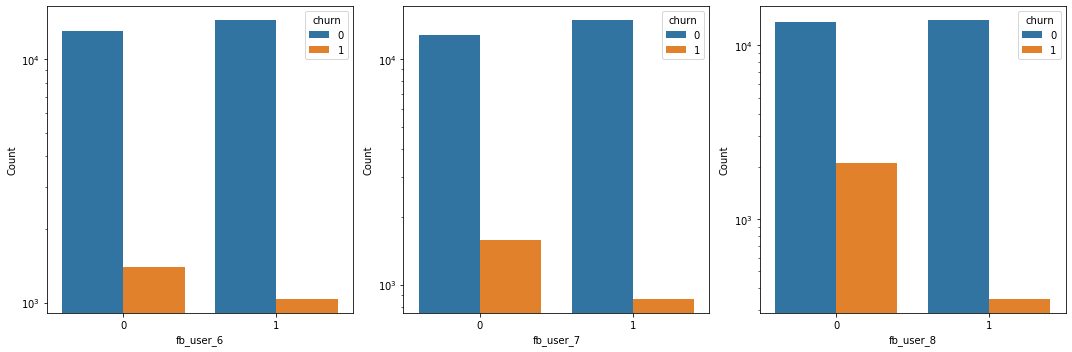

In [71]:
categorical_kpi_churn('fb_user')

# Non KPI features vs Churn analysis

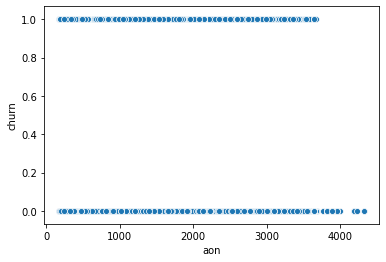

In [72]:
sns.scatterplot(x="aon", y="churn", data=HVC)
plt.show()

All Churn case having aon value greater than (approx) 3500.

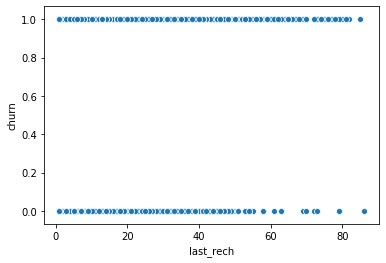

In [73]:
sns.scatterplot(x="last_rech", y="churn", data=HVC)
plt.show()

Customers who have not recharged for more than (approx) 50 days are more likely to churn

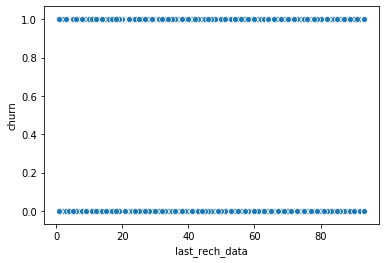

In [74]:
sns.scatterplot(x="last_rech_data", y="churn", data=HVC)
plt.show()

We can't conclude from this plot

# Analyzing the correlation

In [75]:
# Method to plot heatmap using corr
def heatmap(features):
    # Let's see the correlation matrix 
    plt.figure(figsize = (30,25)) 
    g = sns.heatmap(HVC[features].corr(),cmap="coolwarm",annot = True, vmin=0.50)
    plt.show()
    

# filter absolute correlation value based upon given factor
def get_strong_correlated(features, corr_factor):
    corr = HVC[features].corr().abs().unstack()
    return corr[(corr!=1) & (corr>=corr_factor)].sort_values(ascending = False).reset_index() 

Outgoing Calls features correlation

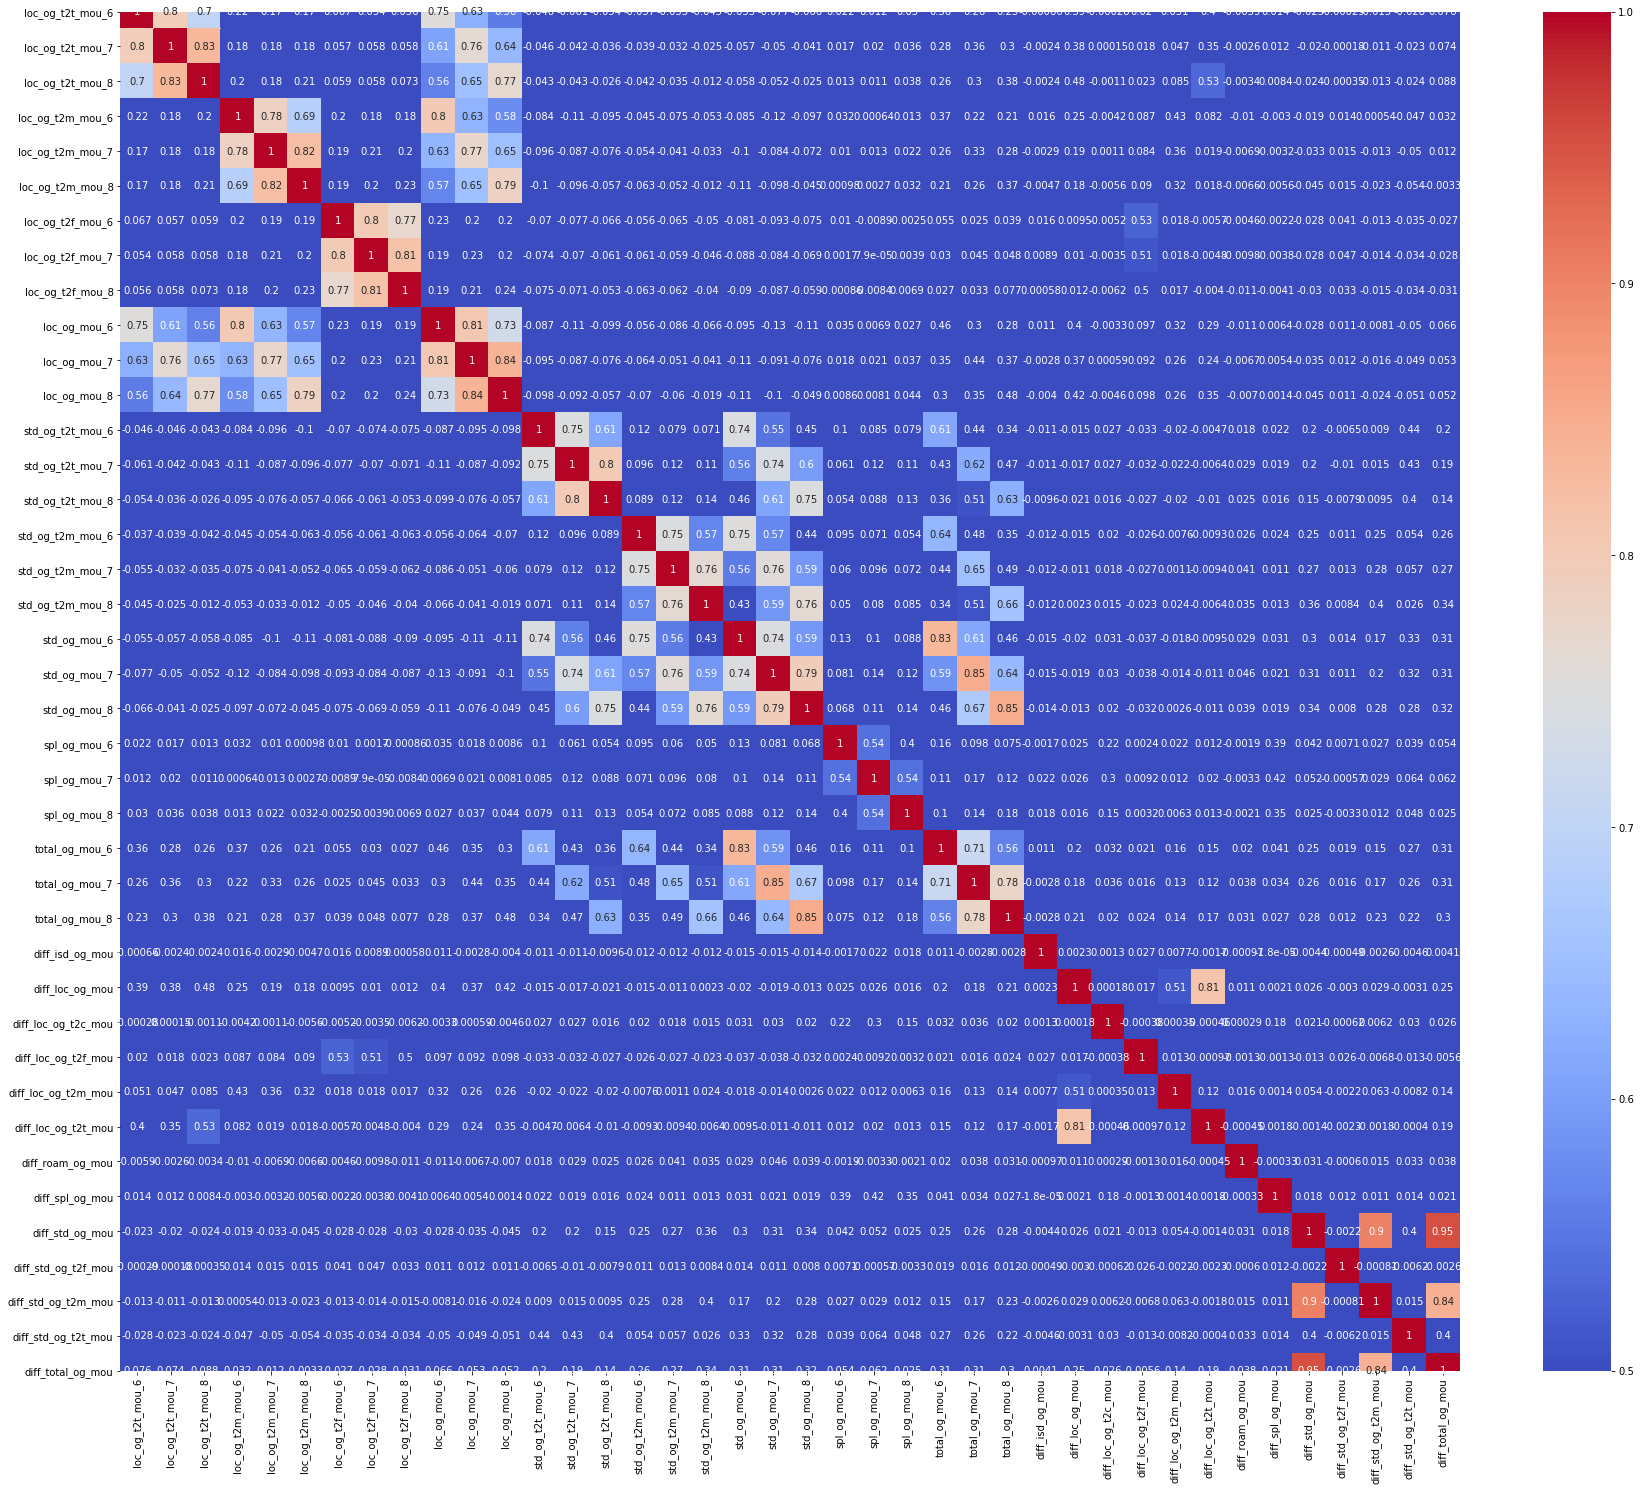

In [76]:
outgoing_features = HVC.columns.to_series().filter(regex='og_')
heatmap(outgoing_features)

In [77]:
#getting highly correlated features
get_strong_correlated(outgoing_features, 0.85)

,level_0,level_1,0
0,diff_total_og_mou,diff_std_og_mou,0.952572
1,diff_std_og_mou,diff_total_og_mou,0.952572
2,diff_std_og_t2m_mou,diff_std_og_mou,0.902513
3,diff_std_og_mou,diff_std_og_t2m_mou,0.902513
4,total_og_mou_8,std_og_mou_8,0.850274
5,std_og_mou_8,total_og_mou_8,0.850274


In [78]:
# Removing correlated features
columns = ["total_og_mou_8","diff_std_og_mou","diff_std_og_t2m_mou"]

HVC = HVC.drop(columns, axis=1)

Incoming call features correlation

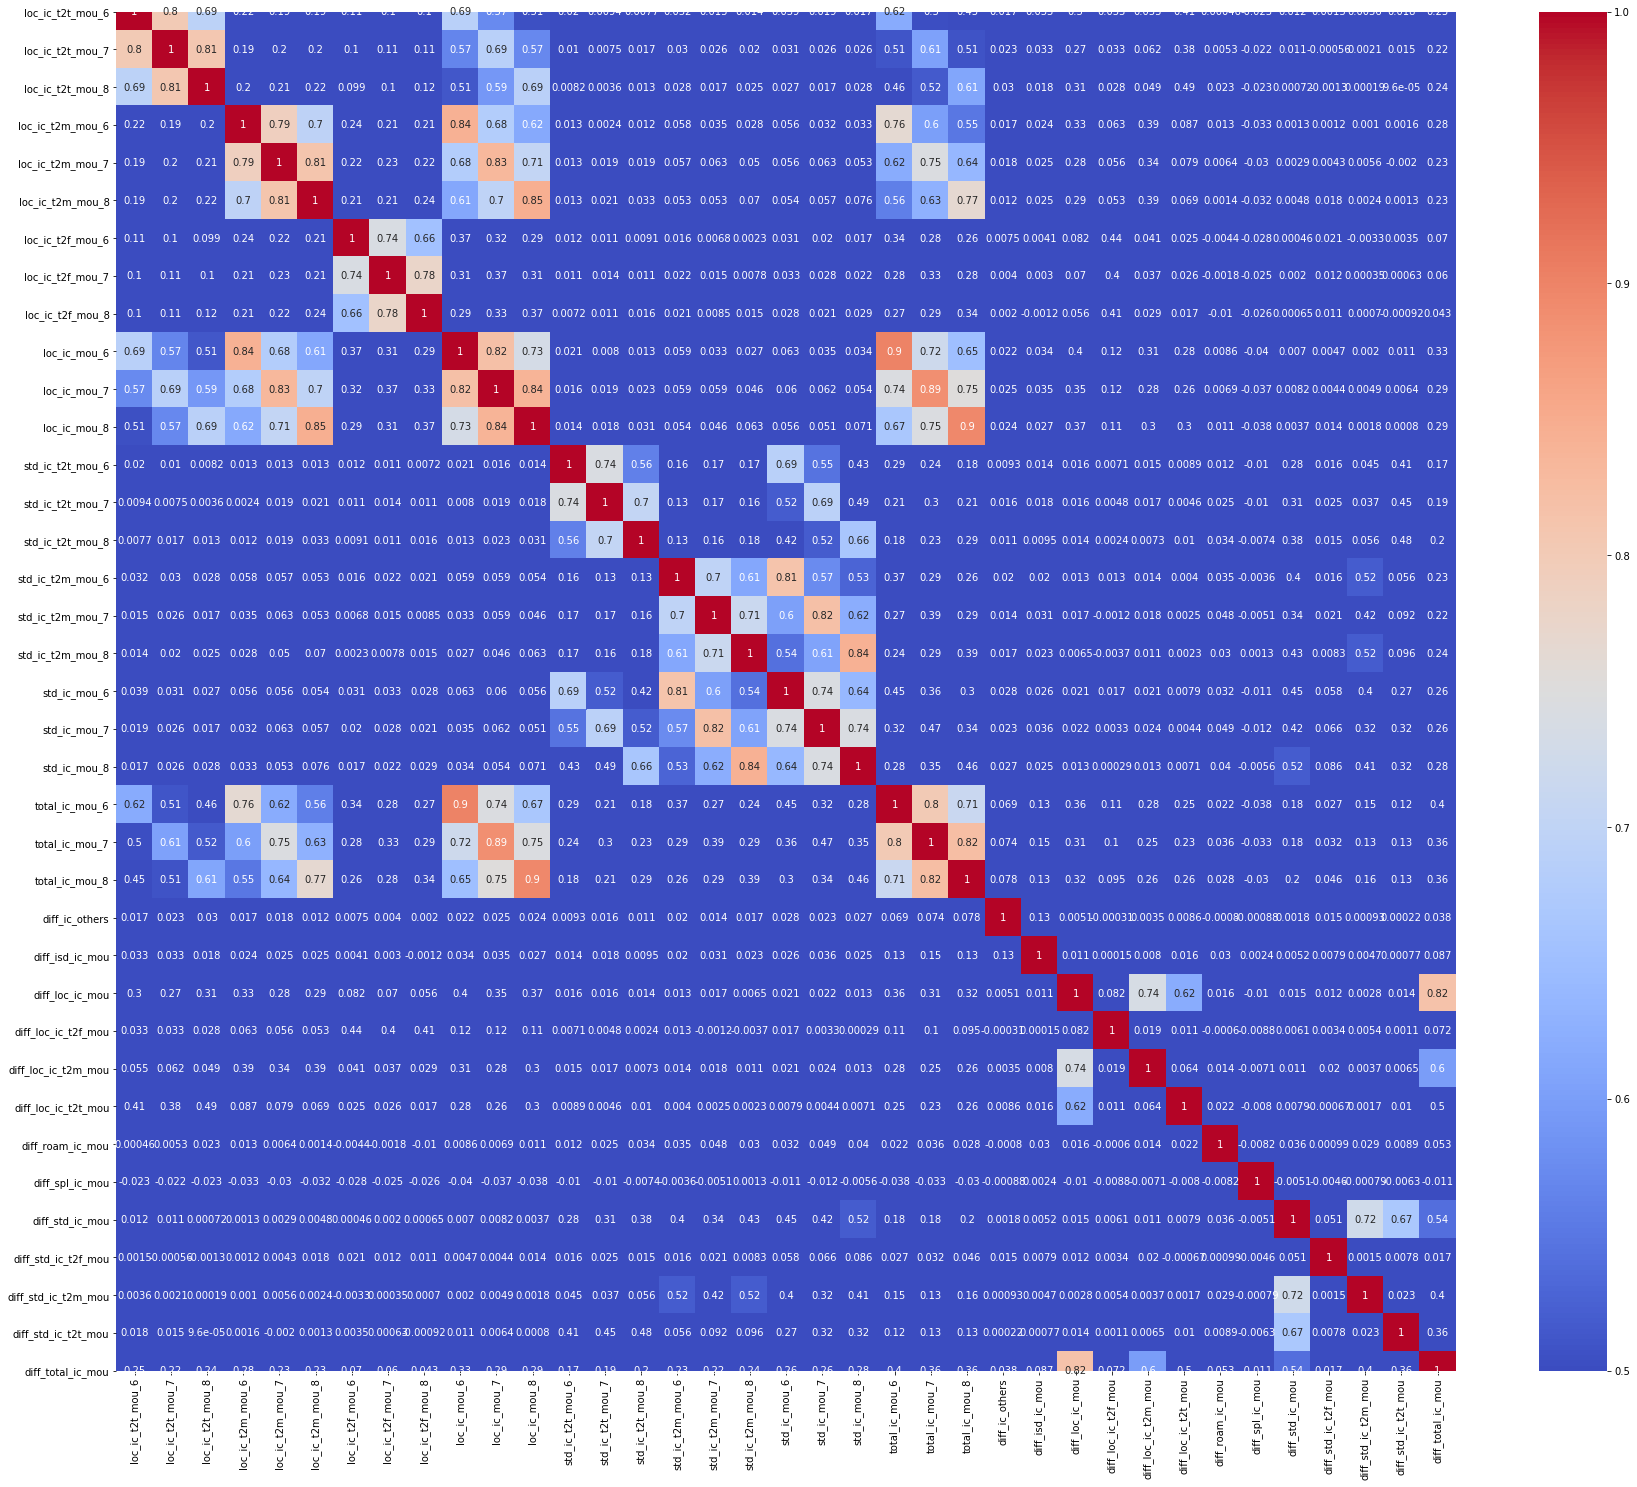

In [79]:
incoming_features = HVC.columns.to_series().filter(regex='ic_')
heatmap(incoming_features)

In [80]:
# getting highly correlated features
get_strong_correlated(incoming_features, 0.85)

,level_0,level_1,0
0,total_ic_mou_6,loc_ic_mou_6,0.902167
1,loc_ic_mou_6,total_ic_mou_6,0.902167
2,total_ic_mou_8,loc_ic_mou_8,0.896414
3,loc_ic_mou_8,total_ic_mou_8,0.896414
4,total_ic_mou_7,loc_ic_mou_7,0.887310
5,loc_ic_mou_7,total_ic_mou_7,0.887310


In [81]:
# deleting correlated features
features = ["total_ic_mou_6","total_ic_mou_8","total_ic_mou_7"]

HVC = HVC.drop(features, axis=1)

Recharge Features correlation

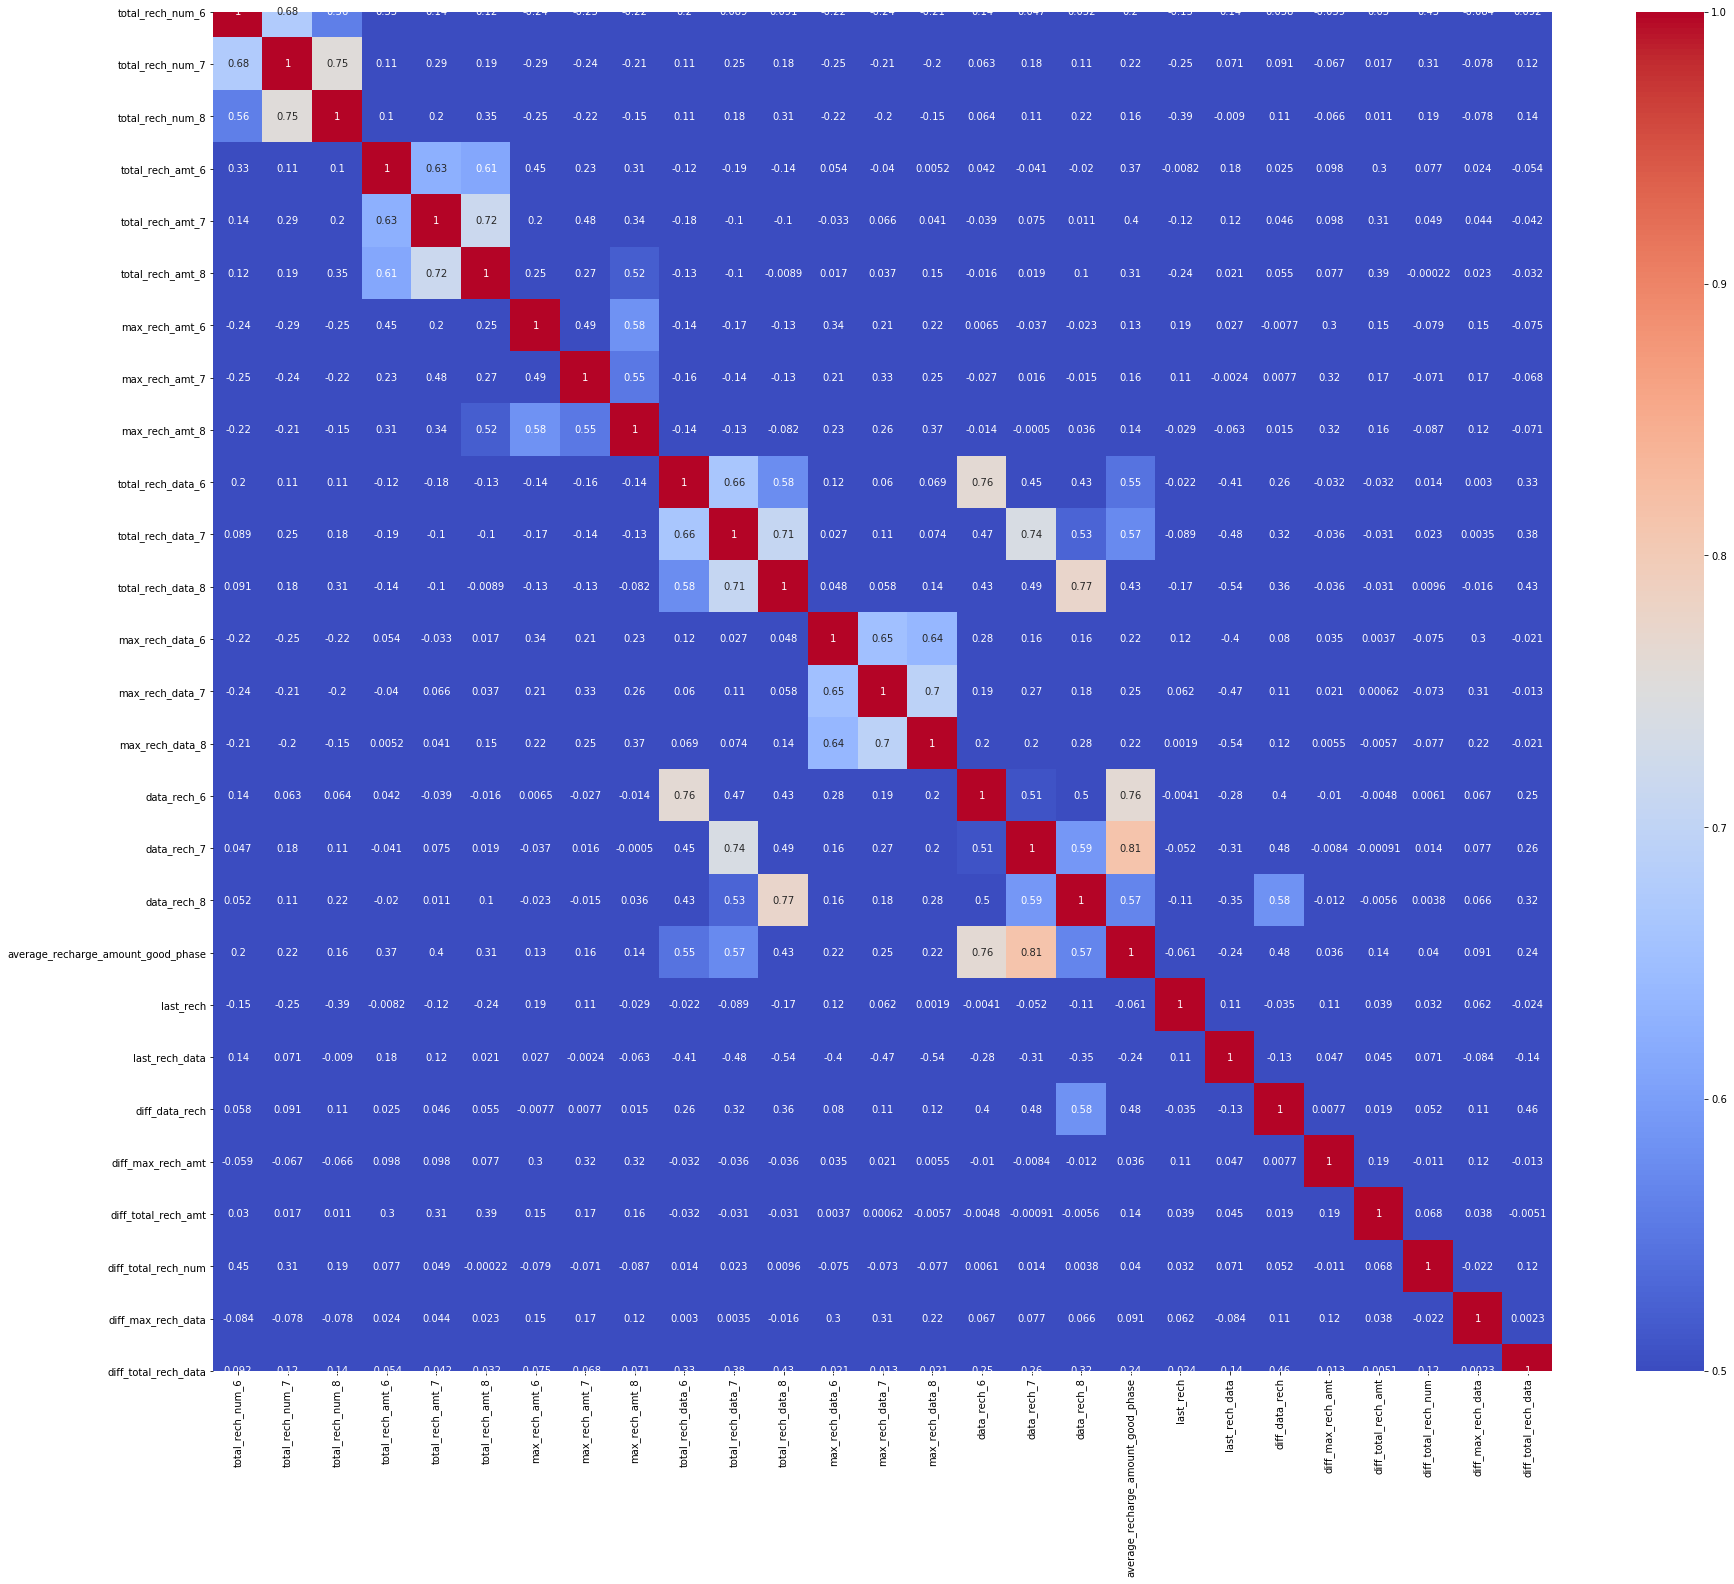

In [82]:
recharge_features = HVC.columns.to_series().filter(regex='rech')
heatmap(recharge_features)

In [83]:
# getting higly correlated features
get_strong_correlated(recharge_features, 0.85)

,level_0,level_1,0


3g data features correlation

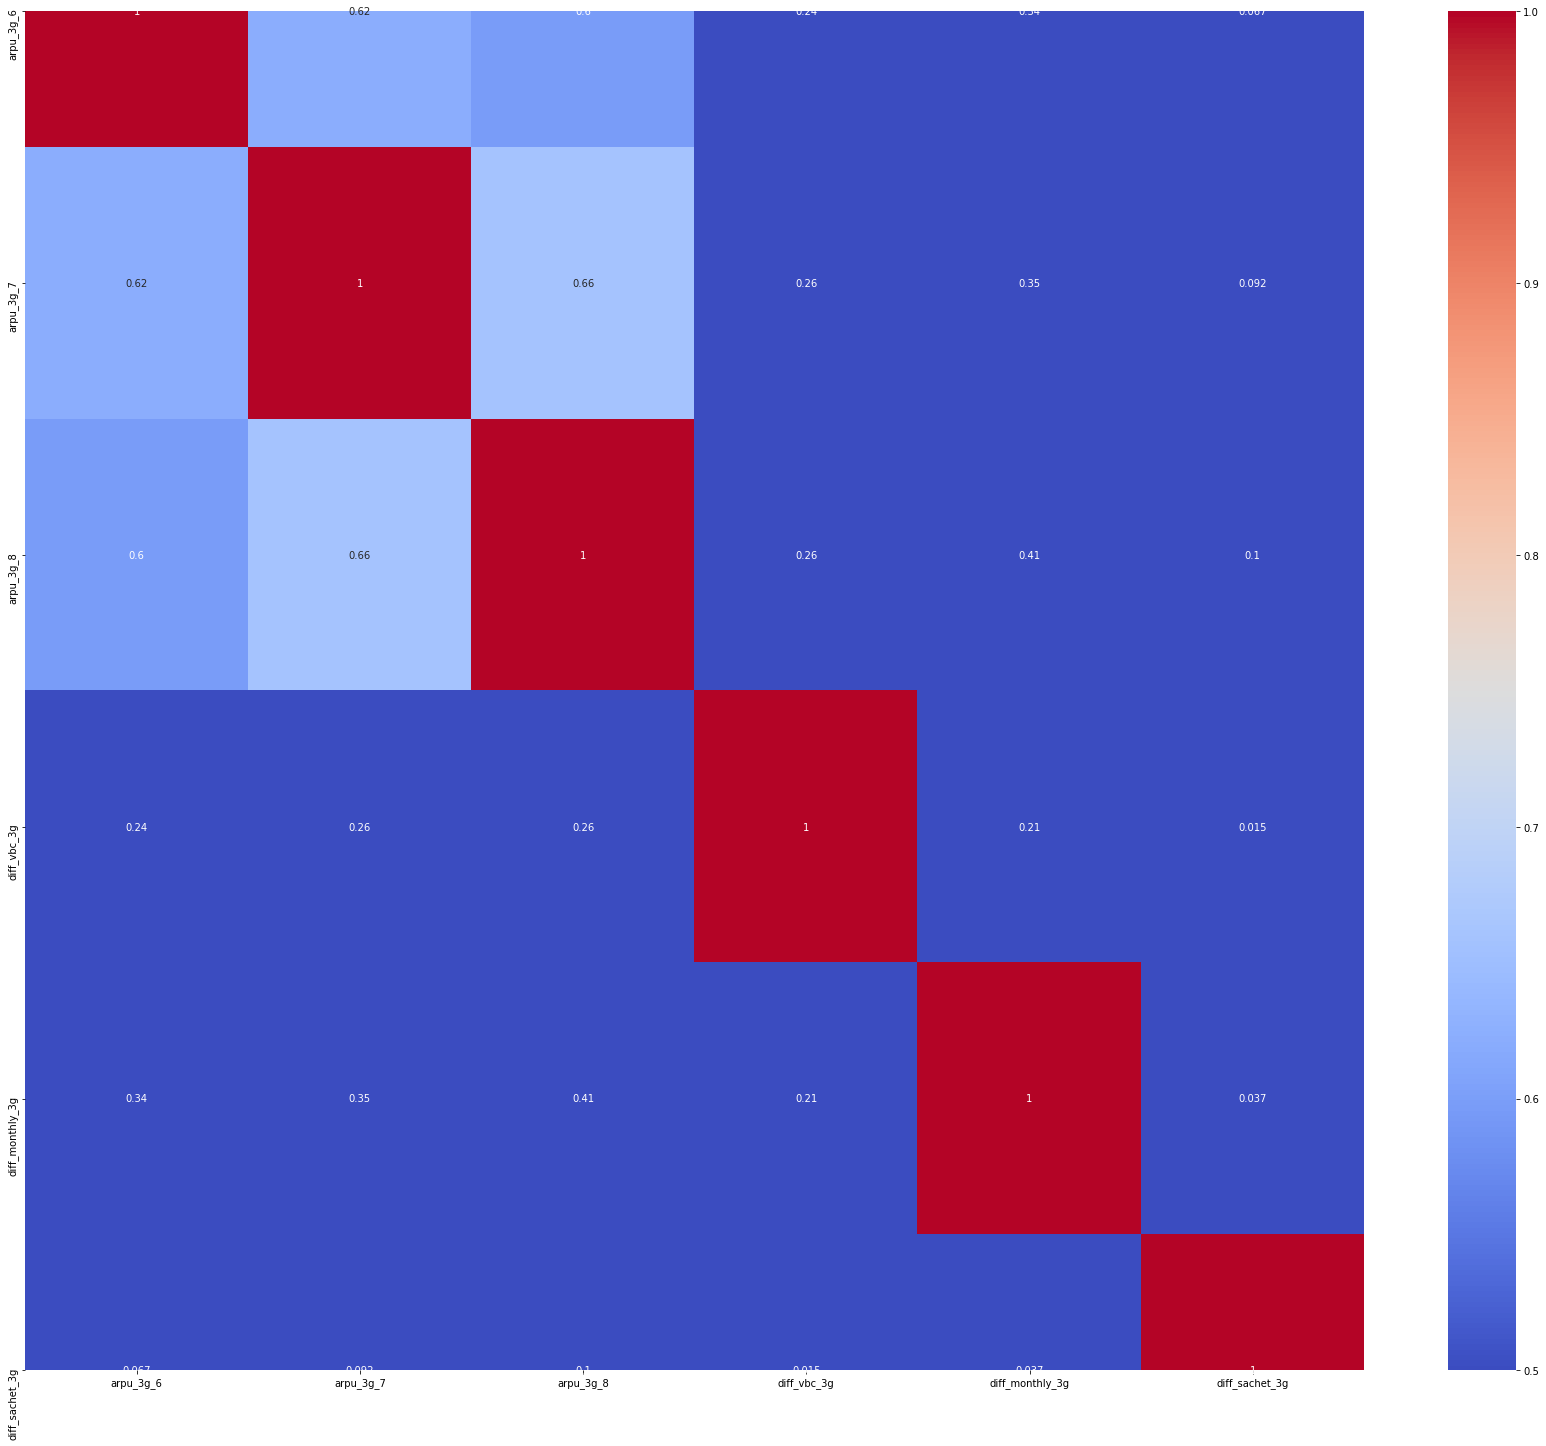

In [84]:
data_3g_features = HVC.columns.to_series().filter(regex='3g')
heatmap(data_3g_features)

In [85]:
# getting highly correlated features
get_strong_correlated(data_3g_features, 0.85)

,level_0,level_1,0


2g data features correlation

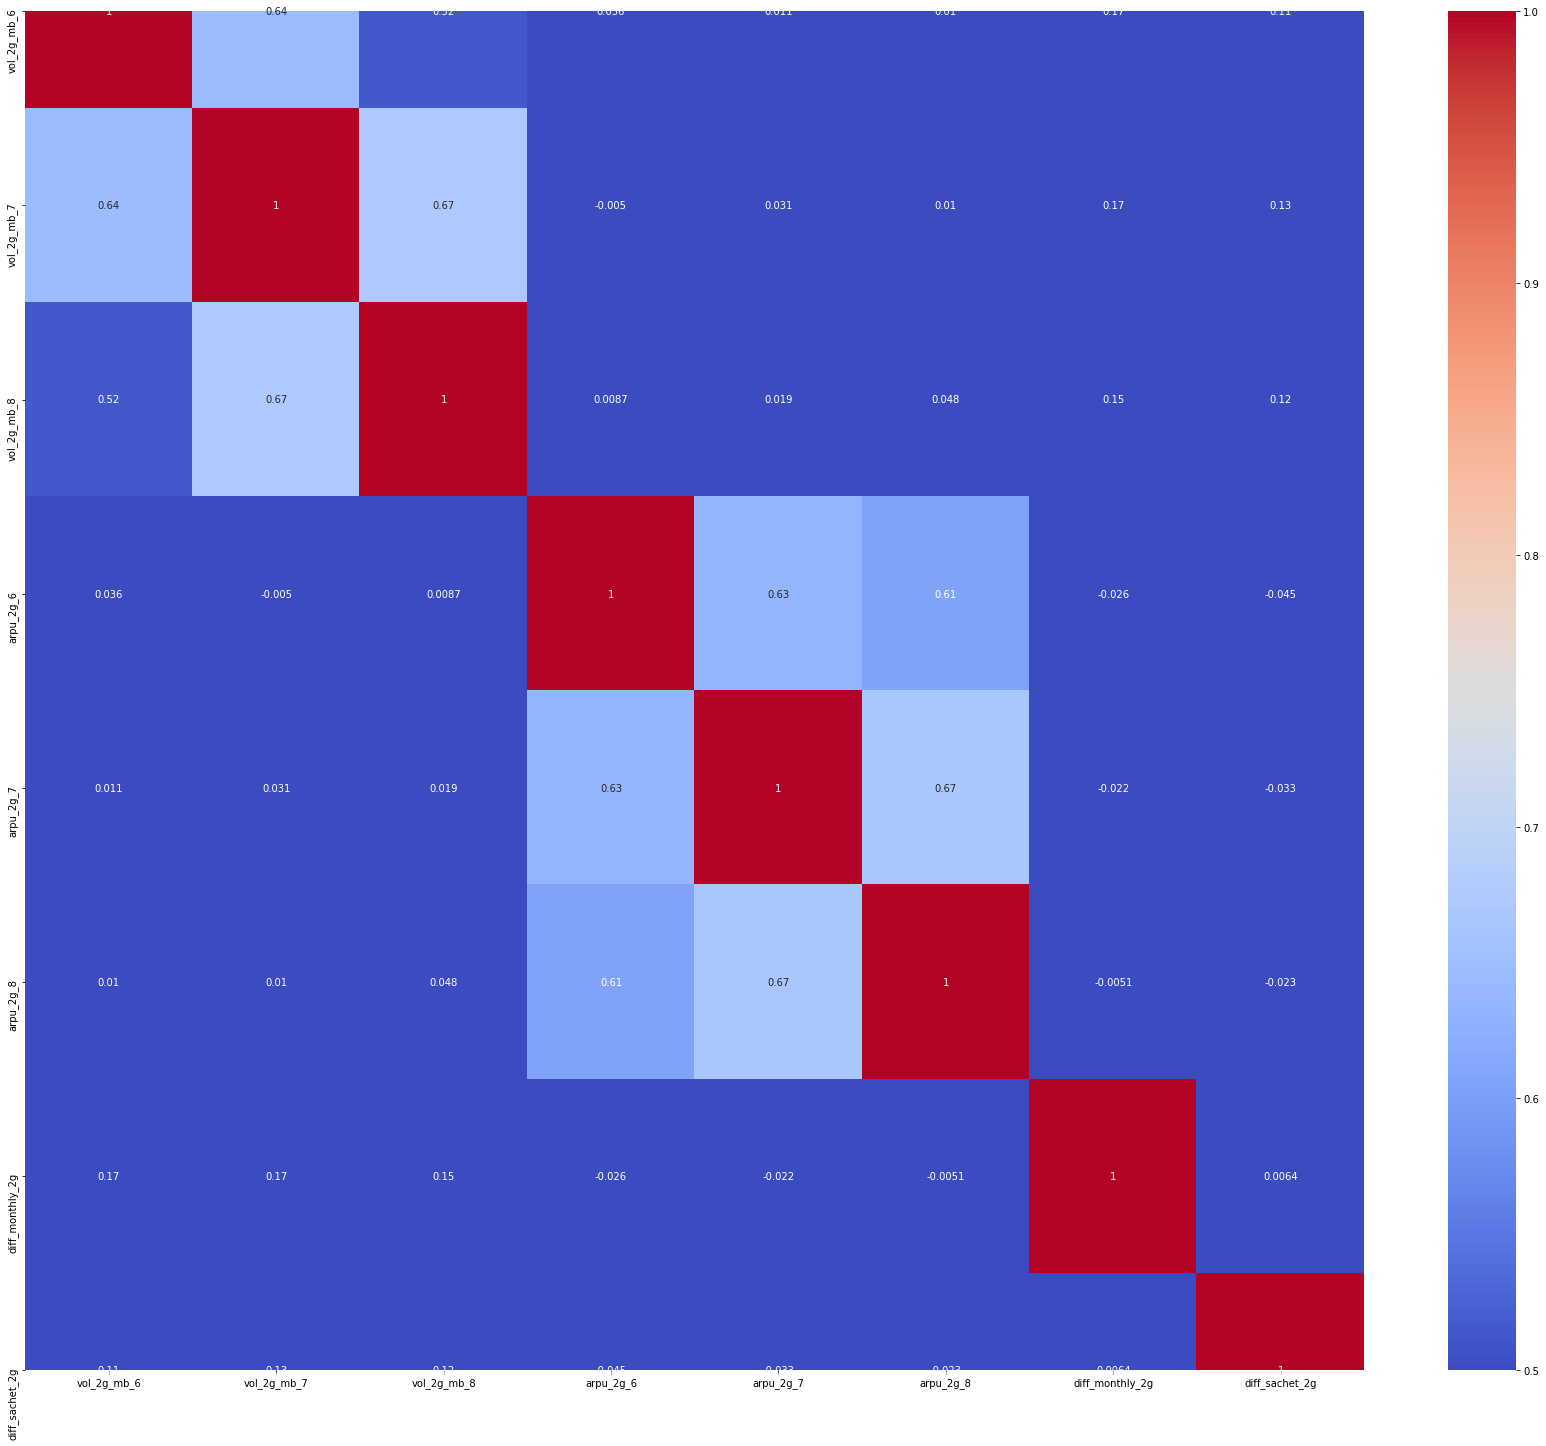

In [86]:
data_2g_features = HVC.columns.to_series().filter(regex='2g')
heatmap(data_2g_features)

In [87]:
# getting highly correlated features
get_strong_correlated(data_2g_features, 0.85)

,level_0,level_1,0


ARPU Features correaltion

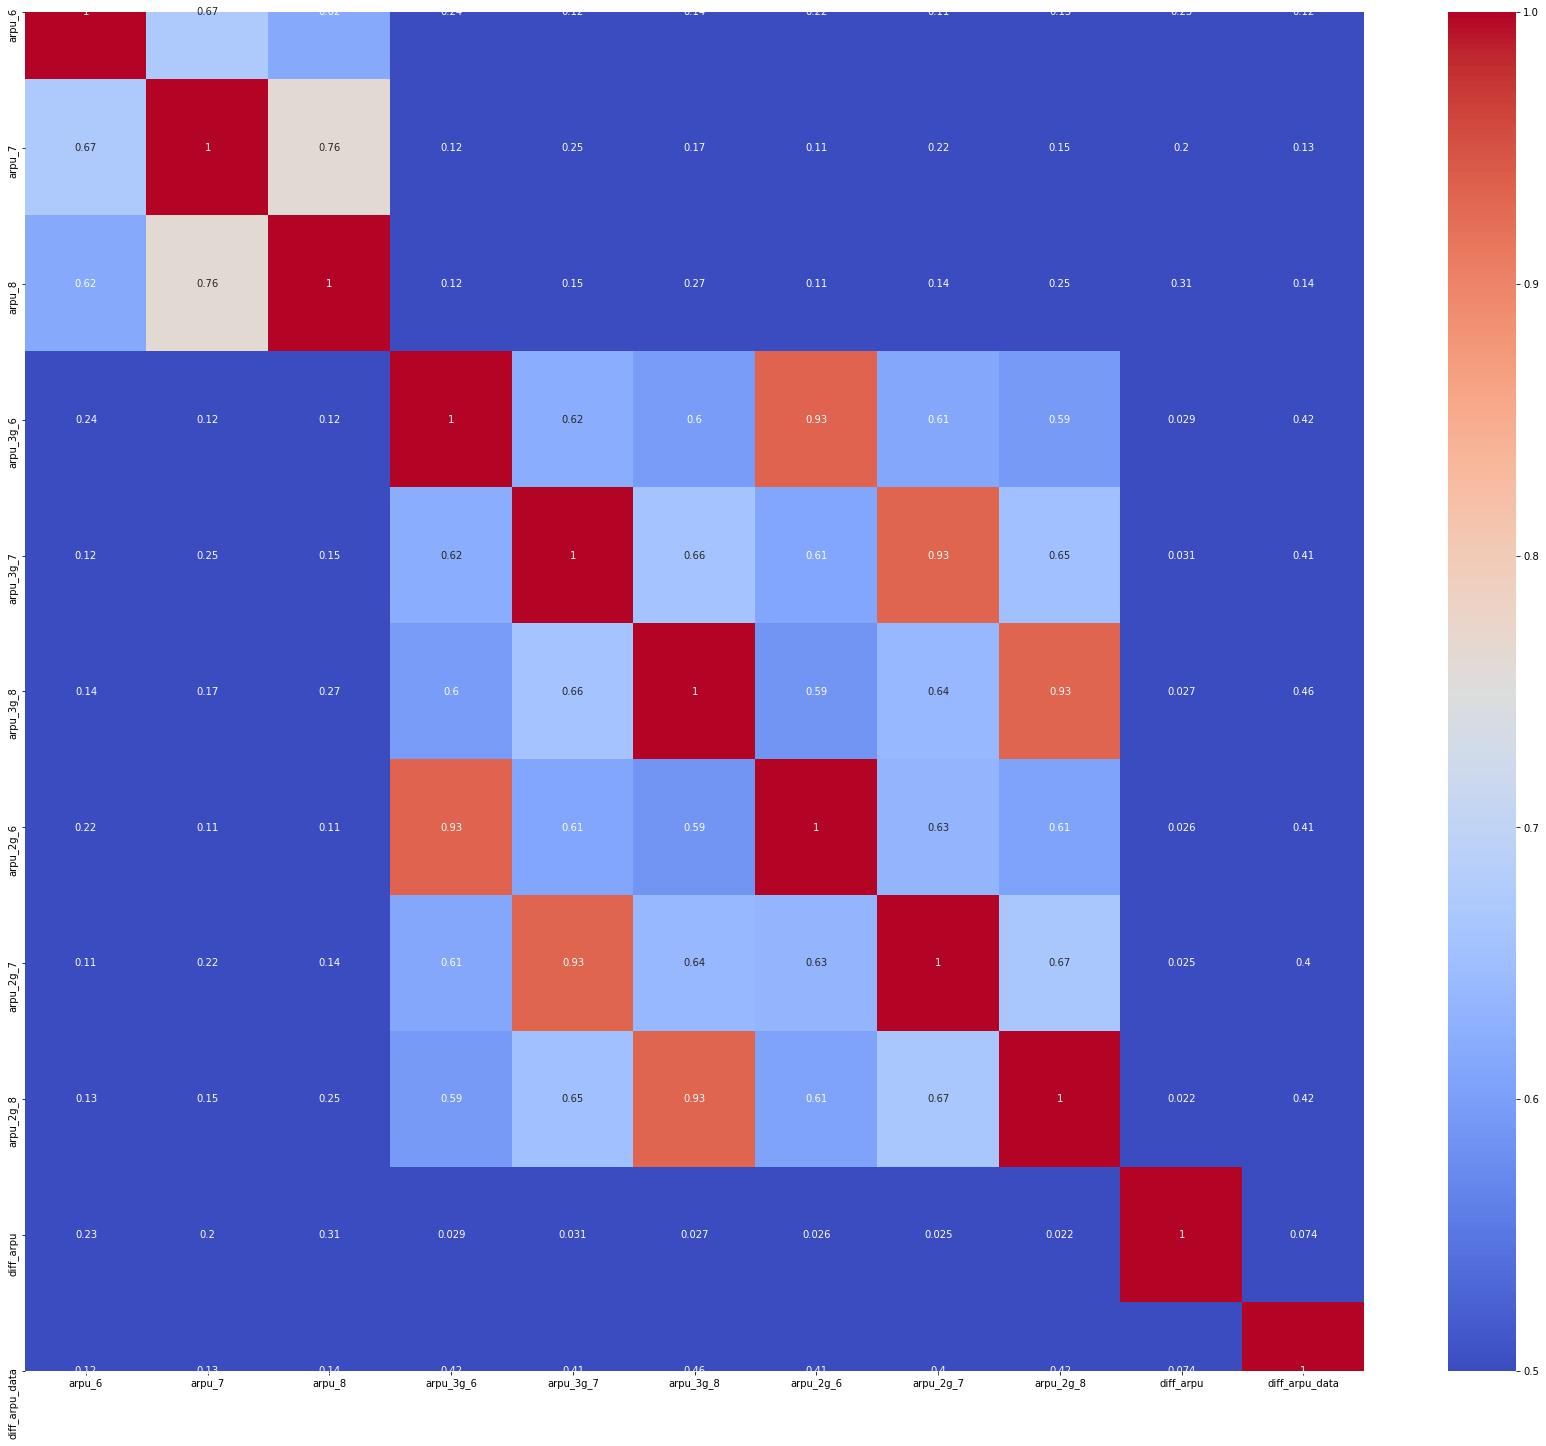

In [88]:
arpu_features = HVC.columns.to_series().filter(regex='arpu')
heatmap(arpu_features)

In [89]:
# getting highly correlated features

get_strong_correlated(arpu_features, 0.85)

,level_0,level_1,0
0,arpu_2g_6,arpu_3g_6,0.933886
1,arpu_3g_6,arpu_2g_6,0.933886
2,arpu_2g_7,arpu_3g_7,0.932309
3,arpu_3g_7,arpu_2g_7,0.932309
4,arpu_2g_8,arpu_3g_8,0.932287
5,arpu_3g_8,arpu_2g_8,0.932287


In [90]:
# deleating arpu correlated features
HVC = HVC.drop([ "arpu_2g_6","arpu_2g_7","arpu_2g_8"], axis=1)

# Data Preparation

In [91]:
# categorical features
HVC.select_dtypes(include=['category', 'object']).columns.drop("churn")

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'voice_call_usage_type_6',
       'voice_call_usage_type_7', 'voice_call_usage_type_8',
       'good_phase_avg_rech_type', 'action_phase_rech_type'],
      dtype='object')

In [92]:
# features that needs to be converted to numbers
number_converitable= (get_kpi_attributes_names('night_pck_user') + get_kpi_attributes_names('fb_user') + ['churn'])

# Converting to int 
HVC[number_converitable] = HVC[number_converitable].astype(np.int)

Creating Dummy Variables

In [93]:
# Method to encode categorial attributes
def encode_dummies(columns):
    dummy_df = HVC
    
    # list of new columns
    dummy_columns = [];
    for column in columns: 
        dummy = pd.get_dummies(HVC[column], prefix=column).iloc[:, :-1]
        dummy_columns = dummy_columns + dummy.columns.tolist()
    
        # effective_df = effective_df + new columns
        dummy_df = pd.concat([dummy_df.drop(column, axis=1), dummy], axis=1)
    return dummy_df, dummy_columns

In [94]:
dummy_features = get_kpi_attributes_names('voice_call_usage_type') + ['good_phase_avg_rech_type', 'action_phase_rech_type']
HVC, dummies_features = encode_dummies(dummy_features)

In [95]:
HVC.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,data_rech_6,data_rech_7,data_rech_8,average_recharge_amount_good_phase,churn,last_rech,last_rech_data,diff_arpu,diff_data_rech,diff_ic_others,diff_isd_ic_mou,diff_isd_og_mou,diff_last_day_rch_amt,diff_loc_ic_mou,diff_loc_ic_t2f_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2t_mou,diff_loc_og_mou,diff_loc_og_t2c_mou,diff_loc_og_t2f_mou,diff_loc_og_t2m_mou,diff_loc_og_t2t_mou,diff_max_rech_amt,diff_offnet_mou,diff_onnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_spl_ic_mou,diff_spl_og_mou,diff_std_ic_mou,diff_std_ic_t2f_mou,diff_std_ic_t2m_mou,diff_std_ic_t2t_mou,diff_std_og_t2f_mou,diff_std_og_t2t_mou,diff_total_ic_mou,diff_total_og_mou,diff_total_rech_amt,diff_total_rech_num,diff_vbc_3g,diff_max_rech_data,diff_monthly_2g,diff_monthly_3g,diff_sachet_2g,diff_sachet_3g,diff_total_rech_data,diff_total_data,diff_arpu_data,good_phase_onnet_offnet_difference,action_phase_onnet_offnet_difference,voice_call_usage_type_6_Active_IC,voice_call_usage_type_6_Active_OG,voice_call_usage_type_6_Active_all,voice_call_usage_type_7_Active_IC,voice_call_usage_type_7_Active_OG,voice_call_usage_type_7_Active_all,voice_call_usage_type_8_Active_IC,voice_call_usage_type_8_Active_OG,voice_call_usage_type_8_Active_all,good_phase_avg_rech_type_low,good_phase_avg_rech_type_low_medium,good_phase_avg_rech_type_medium,good_phase_avg_rech_type_high,action_phase_rech_type_low,action_phase_rech_type_low_medium,action_phase_rech_type_medium,action_phase_rech_type_high
0,197.385,214.816,213.803,88.06,86.885,0.00,229.635,227.12,0.00,25.58,25.78,0.00,80.24,81.685,0.00,0.11,0.21,0.00,129.35,132.73,0.00,3.36,3.30,0.00,18.185,17.75,0.00,50.795,50.035,0.00,0.31,0.81,0.00,0.00,0.00,26.03,26.66,0.16,86.76,88.37,4.13,2.01,2.16,1.15,138.63,141.79,5.44,0.48,0.55,0.00,5.34,5.54,0.00,11.98,12.74,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,212.17,212.17,212.17,0,0,0,1,1,1,968,252.0,252.0,252.0,559.0,1,24,24,5.932851e+01,0.0,0.000000,0.000000,0.000000,0.00,18162.952900,0.874225,6961.399225,685.654225,17171.481600,0.0000,0.025600,6554.926406,659.462400,0.00,52156.282506,7651.438256,0.0000,0.000000,0.000000,0.3136,152.769600,0.000000,29.593600,0.265225,0.0000,11.088900,29.593600,0.000000,3025.0,2.25,408.040000,0.00,0.00,0.0,0.00,0.0,0.0,307.300900,0.000000,7.941688e+04,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
7,1069.180,1349.850,3171.480,57.84,54.680,52.29,453.430,567.16,325.91,51.39,31.38,40.28,308.63,447.380,162.28,62.13,55.14,53.23,422.16,533.91,255.79,4.30,23.29,12.01,49.890,31.76,49.14,60.860,75.140,77.84,4.50,0.00,6.50,487.53,609.24,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,180.54,173.08,193.94,5,

# Splitting Data

Splitting in 70:30 ratio

In [96]:
HVC_train, HVC_test, = train_test_split(HVC, stratify=HVC['churn'], train_size=0.7, random_state=130)

In [97]:
X_train = HVC_train.drop('churn', axis=1)
y_train = HVC_train['churn']

X_test = HVC_test.drop('churn', axis=1)
y_test = HVC_test['churn']

# Scaling

In [98]:
scaler = StandardScaler()
scaler.fit(X_train[:])
X_train[:] = scaler.transform(X_train[:])
X_test[:] = scaler.transform(X_test[:])

# Data Modelling

1) Without PCA
2) With PCA

In [99]:
# Finding Class Weights

# recipe to plot confusion_matrix with normalized matrix & report
def confusion_matrix_plot(y, y_pred, title=None):
    
    fig = plt.figure(figsize=(15, 5))
    if title:
        fig.suptitle(title, fontsize=15)
    
    # confusion matrix
    cfn_matrix = confusion_matrix(y, y_pred)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True, fmt="d", ax=plt.subplot(1,2,1))
    plt.title('Confusion Matrix', fontsize=12)
    plt.ylabel('Actual Churn')
    plt.xlabel('Predicted Churn')
    
    
    # normalize confusion matrix
    y_non_churn = (y_test == 0).sum()
    y_churn = (y_test == 1).sum()

    cfn_norm_matrix = np.array([[1.0 / y_non_churn, 1.0/y_non_churn], [1.0/y_churn, 1.0/ y_churn]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5, annot=True, ax=plt.subplot(1,2,2))
    plt.title("Normalize Matrix", fontsize=12)
    plt.ylabel('Actual Churn')
    plt.xlabel('Predicted Churn')
    plt.show()
    
    # print classification report
    display(pd.DataFrame(classification_report(y,y_pred, output_dict=True)))

In [100]:
# Method to plot pr curve
def pr_curve_plot(y, y_pred_prob, ax=None, color=None, label=None):
    p,r,_ = precision_recall_curve(y_test, y_pred_prob)
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('PR Curve', fontsize=15)
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    if ax:
        return ax.plot(r, p, label=label, color=color, linewidth=2)
    return plt.plot(r, p, label=label, color=color, linewidth=2)

# Method to plot roc curve
def roc_curve_plot(y, y_pred_prob, ax=None, color=None, label=None):
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    plt.xlabel('False Postive Rate', fontsize=12)
    plt.ylabel('True Postive Rate', fontsize=12)
    plt.title('ROC Curve', fontsize=15)
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    if ax:
        return ax.plot(fpr, tpr, label=label, color=color, linewidth=2)
    return plt.plot(fpr, tpr, label=label, color=color, linewidth=2)
    

    

# Method to plot ROC & PR Curve
def plot_curves(y, y_pred_prob):
    fig = plt.figure(figsize=(15,6))
    fig.add_subplot(1,2,1)
    roc_curve_plot(y, y_pred_prob)
    fig.add_subplot(1,2,2)
    pr_curve_plot(y, y_pred_prob)
    plt.show()

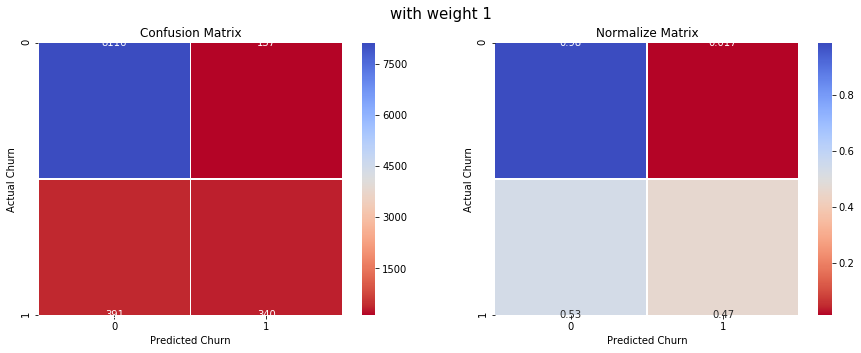

,0,1,accuracy,macro avg,weighted avg
precision,0.954038,0.712788,0.941229,0.833413,0.934408
recall,0.983400,0.465116,0.941229,0.724258,0.941229
f1-score,0.968496,0.562914,0.941229,0.765705,0.935495
support,8253.000000,731.000000,0.941229,8984.000000,8984.000000


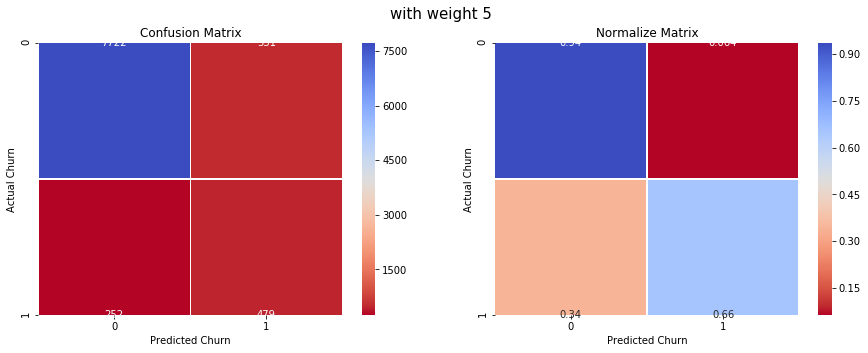

,0,1,accuracy,macro avg,weighted avg
precision,0.968397,0.474257,0.912845,0.721327,0.928191
recall,0.935660,0.655267,0.912845,0.795463,0.912845
f1-score,0.951747,0.550258,0.912845,0.751003,0.919079
support,8253.000000,731.000000,0.912845,8984.000000,8984.000000


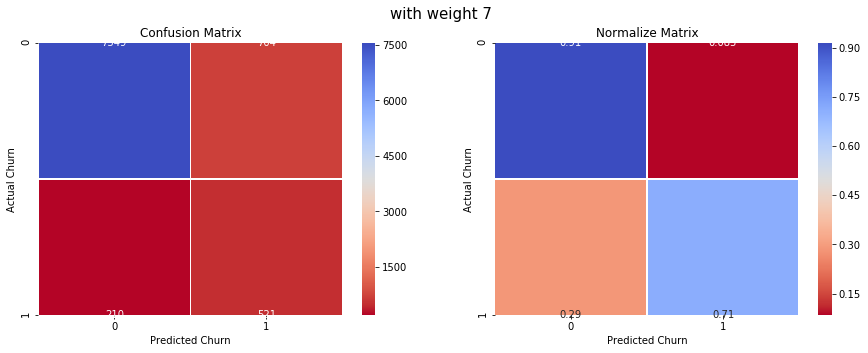

,0,1,accuracy,macro avg,weighted avg
precision,0.972935,0.425306,0.898264,0.699120,0.928376
recall,0.914698,0.712722,0.898264,0.813710,0.898264
f1-score,0.942918,0.532720,0.898264,0.737819,0.909541
support,8253.000000,731.000000,0.898264,8984.000000,8984.000000


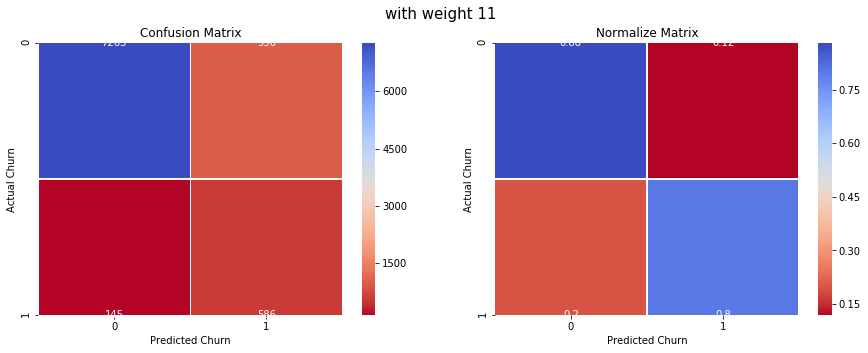

,0,1,accuracy,macro avg,weighted avg
precision,0.980427,0.371827,0.873664,0.676127,0.930907
recall,0.880044,0.801642,0.873664,0.840843,0.873664
f1-score,0.927527,0.508019,0.873664,0.717773,0.893393
support,8253.000000,731.000000,0.873664,8984.000000,8984.000000


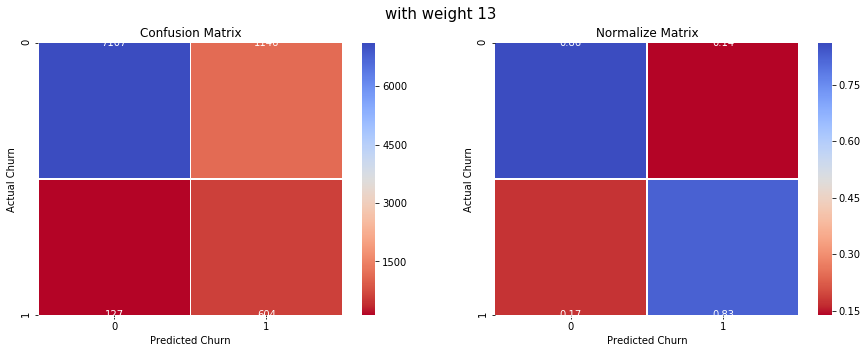

,0,1,accuracy,macro avg,weighted avg
precision,0.982444,0.345143,0.858304,0.663793,0.930589
recall,0.861141,0.826265,0.858304,0.843703,0.858304
f1-score,0.917802,0.486900,0.858304,0.702351,0.882741
support,8253.000000,731.000000,0.858304,8984.000000,8984.000000


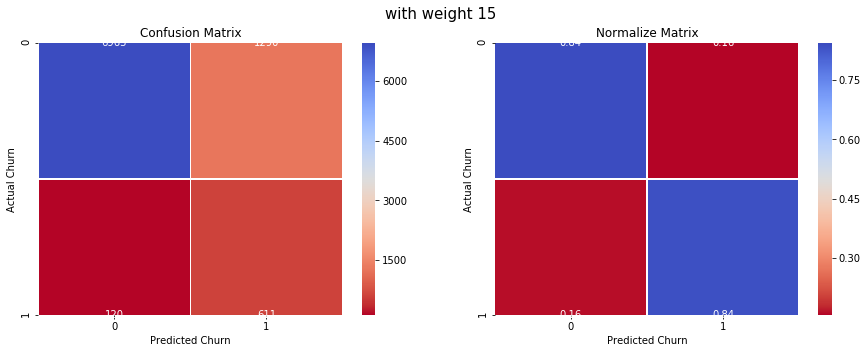

,0,1,accuracy,macro avg,weighted avg
precision,0.983058,0.321410,0.843054,0.652234,0.929222
recall,0.843693,0.835841,0.843054,0.839767,0.843054
f1-score,0.908059,0.464286,0.843054,0.686173,0.871951
support,8253.000000,731.000000,0.843054,8984.000000,8984.000000


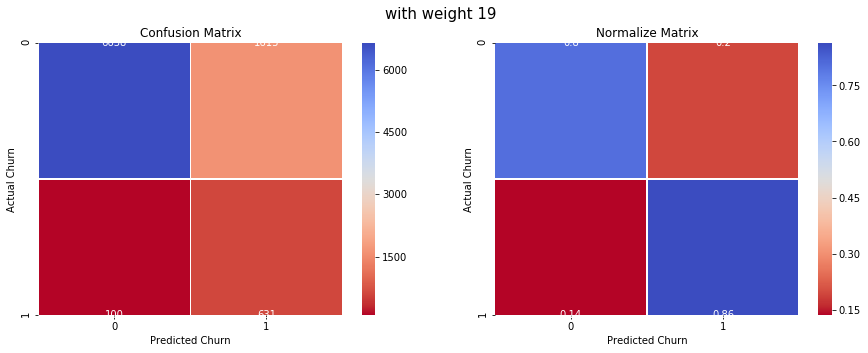

,0,1,accuracy,macro avg,weighted avg
precision,0.985159,0.280944,0.809105,0.633051,0.927859
recall,0.804314,0.863201,0.809105,0.833757,0.809105
f1-score,0.885598,0.423917,0.809105,0.654757,0.848032
support,8253.000000,731.000000,0.809105,8984.000000,8984.000000


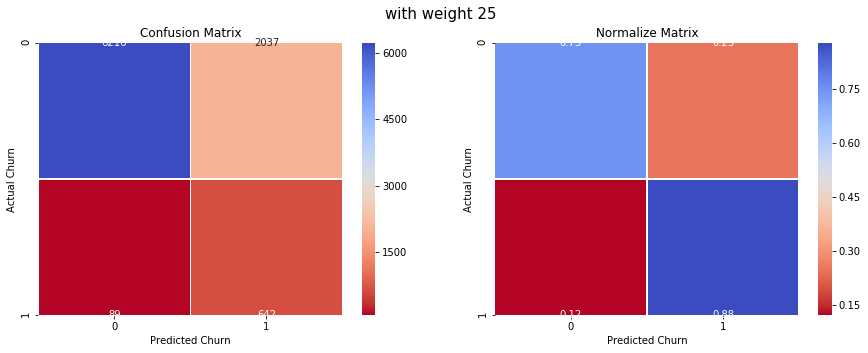

,0,1,accuracy,macro avg,weighted avg
precision,0.985884,0.239642,0.763357,0.612763,0.925165
recall,0.753181,0.878249,0.763357,0.815715,0.763357
f1-score,0.853963,0.376540,0.763357,0.615252,0.815117
support,8253.000000,731.000000,0.763357,8984.000000,8984.000000


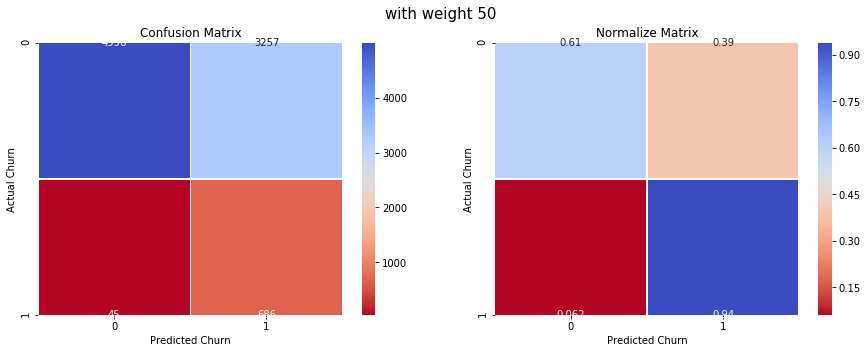

,0,1,accuracy,macro avg,weighted avg
precision,0.991073,0.173979,0.632458,0.582526,0.924589
recall,0.605356,0.938440,0.632458,0.771898,0.632458
f1-score,0.751617,0.293539,0.632458,0.522578,0.714345
support,8253.000000,731.000000,0.632458,8984.000000,8984.000000


In [101]:
# Checking with multiple weights [1,5,7,11,13,15,19,25, 50] and taking penalty as 11

LR_weights = [1,5,7,11,13,15,19,25, 50]

for weight in LR_weights:
    lr = LogisticRegression(class_weight={0:1,1:weight}, C=0.02, penalty='l1',random_state=100, solver='saga')
    lr.fit(X_train,y_train)
    y_test_pred = lr.predict(X_test)
    title = "with weight {} ".format(weight)
    confusion_matrix_plot(y_test, y_test_pred, title)

ROC curve vs PR curve

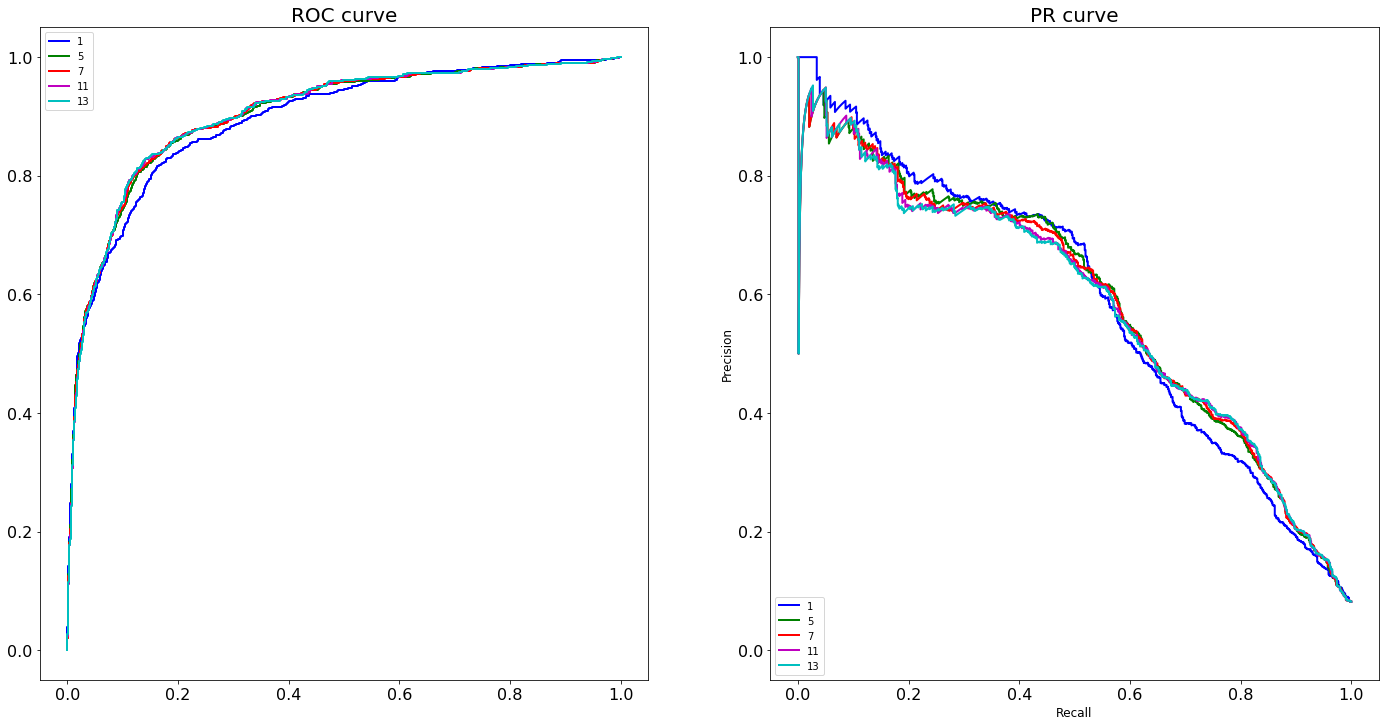

In [102]:
fig = plt.figure(figsize=(24, 12))
fig1 = fig.add_subplot(1,2,1)
fig2 = fig.add_subplot(1,2,2)

for weight,color in zip(LR_weights,'bgrmc'):
    lr = LogisticRegression(class_weight={0:1,1:weight}, C=0.02, penalty='l1',random_state=100, solver='saga')
    lr.fit(X_train,y_train)
    y_test_prob = lr.predict_proba(X_test)[:,1]
    
    roc_curve_plot(y_test, y_test_prob, ax=fig1, color=color, label=weight)
    pr_curve_plot(y_test, y_test_prob, ax=fig2, color=color, label=weight)
   


# title 
fig1.title.set_text('ROC curve')
fig2.title.set_text('PR curve')

fig1.title.set_size(20)
fig2.title.set_size(20)

# position
fig1.legend(loc='top left')
fig2.legend(loc='lower left')

# ticks
fig1.tick_params(axis='both', which='major', labelsize=16)
fig2.tick_params(axis='both', which='major', labelsize=16)

plt.show()

From the plots we can say that, class_weights 11 and 13 are performing well. So we can proceed with these.

In [103]:
class_weight = compute_class_weight('balanced', [0,1], y_train)

Markdown('The weight `{}` is calculated by sklearn'.format('%.2i' % (class_weight[1]/class_weight[0])))

The weight `11` is calculated by sklearn

# 1. Model without PCA

a) Using Decision tree
b) Using Random Forest
c) Using Logistic Regression

a) Using Decision Tree

In [104]:
# Hypertuning
param_grid = {'max_depth': [6,8,10,15], 
              'min_samples_split':[25, 50, 75, 100],  
              'min_samples_leaf': [25, 50, 100],
              'criterion': ['gini', 'entropy'],
              'class_weight':['balanced', {0:1, 1:13}]
             }

stratified = StratifiedKFold(n_splits=4, shuffle=True, random_state=500)

decision_tree = DecisionTreeClassifier(max_features='auto', random_state=200)
dt_cv = GridSearchCV(decision_tree, param_grid, cv=stratified, scoring= 'f1', return_train_score=True, n_jobs = -1, verbose = 1)
dt_cv.fit(X_train, y_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=500, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=200,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced', {0: 1, 1: 13

In [105]:
dt_cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 25,
 'min_samples_split': 25}

In [106]:
decision_tree = dt_cv.best_estimator_

Evaluate Model

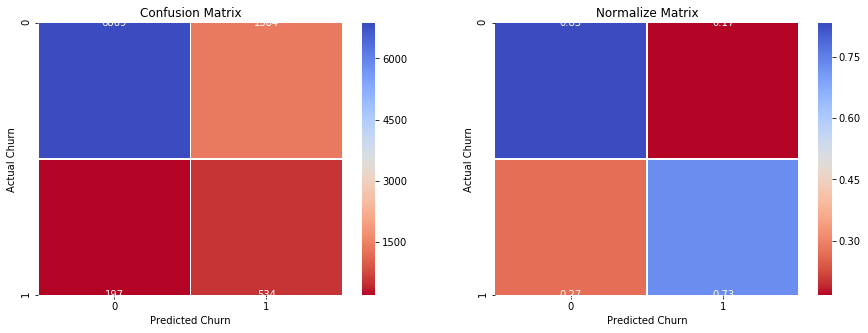

,0,1,accuracy,macro avg,weighted avg
precision,0.972120,0.278415,0.82402,0.625268,0.915675
recall,0.832303,0.730506,0.82402,0.781405,0.824020
f1-score,0.896795,0.403171,0.82402,0.649983,0.856630
support,8253.000000,731.000000,0.82402,8984.000000,8984.000000


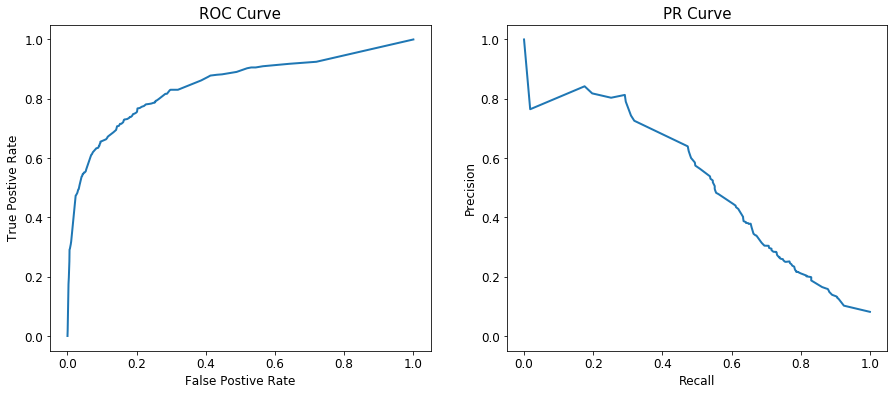

AUC score is `0.78`

In [107]:
y_test_pred = decision_tree.predict(X_test)
confusion_matrix_plot(y_test, y_test_pred)

# ROC curve & PR curve
y_test_probability = decision_tree.predict_proba(X_test)[:,1]
plot_curves(y_test, y_test_probability)

Markdown("AUC score is `{}`".format('%.2f' % roc_auc_score(y_test, y_test_pred)))

# b) Using Random Forest

In [108]:
# HyperTuning
param_grid = {'max_depth': [6, 8,12, 15], 
              'min_samples_split':[100, 150, 200],  
              'min_samples_leaf': [80, 120, 150, 200],
              'n_estimators': [100, 200, 300],
              'class_weight':['balanced', {0:1,1:13}]
             }

stratified = StratifiedKFold(n_splits=3, shuffle=True, random_state=500)
random_forest = RandomForestClassifier(random_state=300,  max_features='auto')

# using random search instead of grid for better performance
rf_cv = RandomizedSearchCV(random_forest, 
                           param_grid, 
                           n_iter = 25, 
                           cv=stratified, 
                           scoring= 'f1', 
                           return_train_score=True, 
                           n_jobs=-1, 
                           verbose =1, 
                           random_state= 200)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  5.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=500, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_...
                                                    random_state=300, verb

In [109]:
# Method to get best value
def get_best_value(cv, field, default_value=None):
    try:
        return cv.best_params_[field]
    except:
        return default_value

In [110]:
min_samples_split = get_best_value(rf_cv, 'min_samples_split', 100)
class_weight_best = get_best_value(rf_cv, 'class_weight', 'balanced')
max_depth = get_best_value(rf_cv, 'max_depth', 8)
n_estimators = get_best_value(rf_cv, 'n_estimators', 300)
min_samples_leaf = get_best_value(rf_cv, 'min_samples_leaf', 150)

In [111]:
Markdown("**The best value of params are:** <br>  min_samples_split=`{}`,  class_weight=`{}`,max_depth=`{}`, n_estimators=`{}`,  min_sample_leaf=`{}`".format(min_samples_split, class_weight_best, max_depth, n_estimators, min_samples_leaf))

**The best value of params are:** <br>  min_samples_split=`100`,  class_weight=`balanced`,max_depth=`12`, n_estimators=`200`,  min_sample_leaf=`80`

In [112]:
# REFit
random_forest = RandomForestClassifier(n_estimators = n_estimators,
                                       max_depth = max_depth,
                                       min_samples_leaf = min_samples_leaf,
                                       min_samples_split = min_samples_split,
                                       class_weight = class_weight_best, 
                                       max_features = 'auto',
                                       random_state = 300)

random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=80,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=300, verbose=0, warm_start=False)

Evaluate Model

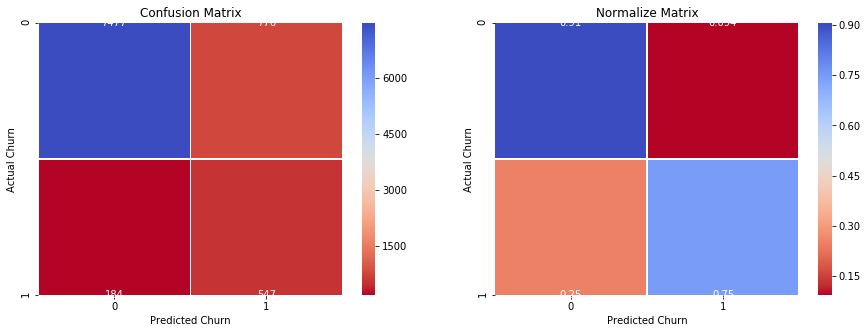

,0,1,accuracy,macro avg,weighted avg
precision,0.975982,0.413454,0.893143,0.694718,0.930211
recall,0.905974,0.748290,0.893143,0.827132,0.893143
f1-score,0.939676,0.532619,0.893143,0.736148,0.906555
support,8253.000000,731.000000,0.893143,8984.000000,8984.000000


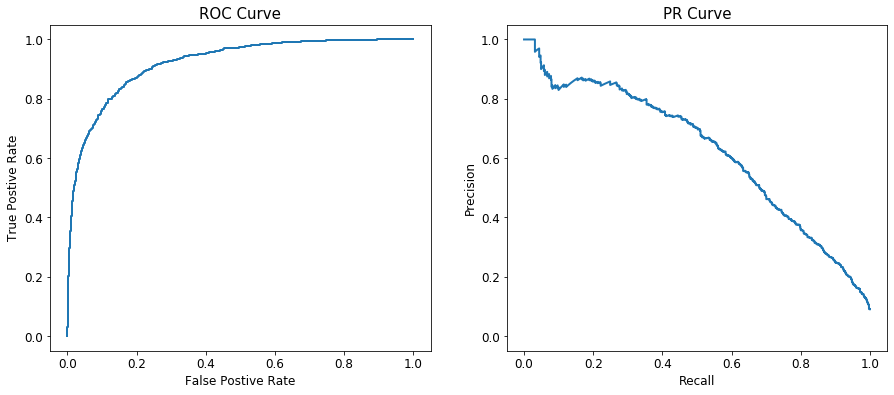

AUC score is `0.83`

In [113]:
y_test_pred = random_forest.predict(X_test)
confusion_matrix_plot(y_test, y_test_pred)

# ROC curve & PR curve
y_test_prob = random_forest.predict_proba(X_test)[:,1]
plot_curves(y_test, y_test_prob)

Markdown("AUC score is `{}`".format('%.2f' % roc_auc_score(y_test, y_test_pred)))

Selecting top 30 features though random forest

In [114]:
Top30_feature = pd.DataFrame(random_forest.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)


# sorted by importance
Top30_feature[:30]

,importance
voice_call_usage_type_8_Active_all,0.078718
last_day_rch_amt_8,0.068979
total_rech_amt_8,0.049398
action_phase_rech_type_low,0.048456
loc_ic_mou_8,0.047497
loc_ic_t2m_mou_8,0.039556
max_rech_amt_8,0.038966
loc_og_t2m_mou_8,0.035364
last_rech,0.034097
data_rech_8,0.032965


# c) Using Logistic Regression

In [115]:
# HyperTuning
param_grid= {'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.08, 0.09]}
stratified = StratifiedKFold(n_splits=4, shuffle=True, random_state=500)

# base regression: since we want to select top features L1=Lasso is chosen with solver saga
logistic_regression = LogisticRegression(class_weight={0:1, 1:13}, penalty='l1',random_state=100, solver='saga')

lr_cv = GridSearchCV(logistic_regression, param_grid, cv=stratified, scoring= 'f1', return_train_score=True, n_jobs=-1, verbose=1)
lr_cv.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=500, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight={0: 1, 1: 13},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=100, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.08,
                               0.09]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=1)

In [116]:
lr_cv.best_estimator_

LogisticRegression(C=0.01, class_weight={0: 1, 1: 13}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=100, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Learning Curve

In [117]:
def learning_curve_plot(result_cv):
    result_cv['param_alpha'] = result_cv['param_C'].astype(np.number)
    plt.figure(figsize=(10,10))
    plt.suptitle('Learning Curve')
    plt.plot(result_cv['param_C'], result_cv['mean_train_score'])
    plt.plot(result_cv['param_C'], result_cv['mean_test_score'])
    
    plt.xlabel('L1 Penality')
    plt.ylabel('F1 Score')
    plt.title("L1 Penality vs. F1 Score")
    plt.legend(['train score', 'test score'], loc='upper right')
    plt.show()

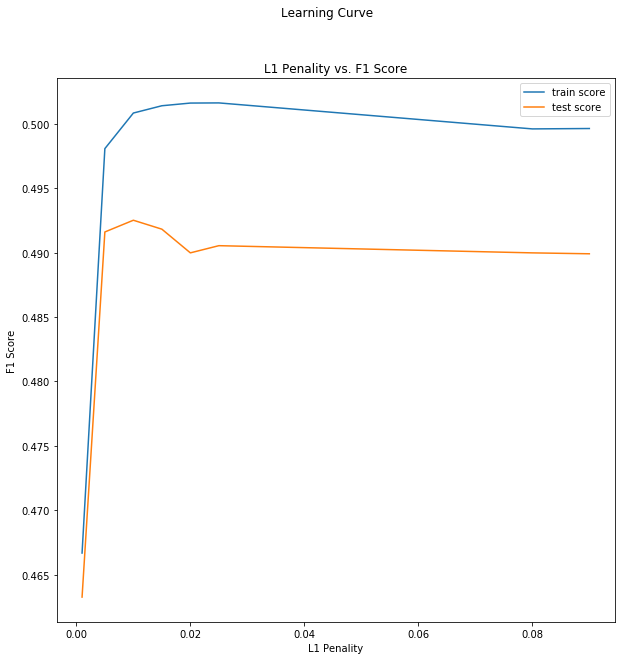

The _best value_ of alpha/C is `0.01`

In [118]:
learning_curve_plot(lr_cv.cv_results_)
Markdown('''The _best value_ of alpha/C is `{C}`'''.format(C='%.2f' % lr_cv.best_params_['C']))

In [119]:
logistic_regression = lr_cv.best_estimator_

Selecting top 30 features

In [120]:
features_coef = pd.DataFrame({'features': X_train.columns, 'coef':logistic_regression.coef_[0]})

# selecting top features
features_coef = features_coef[features_coef['coef'].abs() > 0.0001]


features_coef = features_coef.reindex(features_coef['coef'].abs().sort_values(ascending = False).index)


features_coef[:20]

,features,coef
144,voice_call_usage_type_8_Active_all,-0.715531
91,last_rech,0.462447
46,loc_ic_mou_8,-0.395316
143,voice_call_usage_type_8_Active_OG,-0.394849
67,last_day_rch_amt_8,-0.362872
40,loc_ic_t2m_mou_8,-0.349565
64,max_rech_amt_8,0.334651
20,loc_og_mou_8,-0.293148
85,fb_user_8,-0.281354
14,loc_og_t2m_mou_8,-0.254928


Evaluate Model

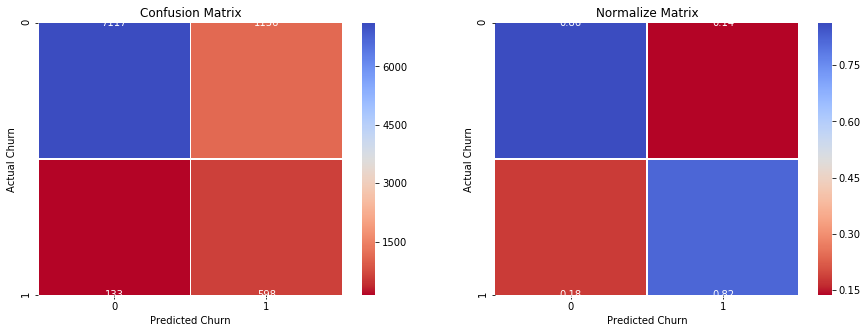

,0,1,accuracy,macro avg,weighted avg
precision,0.981655,0.344867,0.858749,0.663261,0.929842
recall,0.862353,0.818057,0.858749,0.840205,0.858749
f1-score,0.918145,0.485193,0.858749,0.701669,0.882917
support,8253.000000,731.000000,0.858749,8984.000000,8984.000000


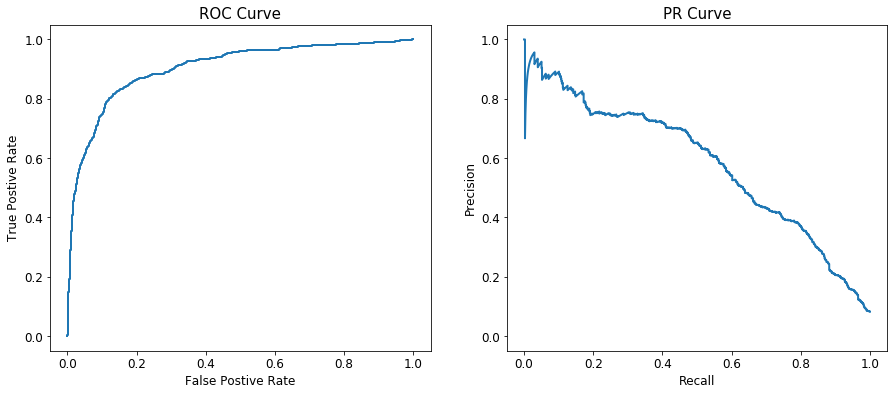

AUC score is `0.84`

In [121]:
y_test_pred = logistic_regression.predict(X_test)
confusion_matrix_plot(y_test, y_test_pred)

# ROC curve & PR curve
y_test_prob = logistic_regression.predict_proba(X_test)[:,1]
plot_curves(y_test, y_test_prob)

Markdown("AUC score is `{}`".format('%.2f' % roc_auc_score(y_test, y_test_pred)))

# Model Comparision

In [122]:
# recipe to plot & print metrics of model produced by different alogs
def models_comparision(alogs, X_test, y_test):
    
    fig=plt.figure(figsize=(20, 10))
    fig.suptitle('Model Performance Comparision', )
    
    fig1 = fig.add_subplot(1, 2, 1)
    fig2 = fig.add_subplot(1, 2, 2)
    
    
    colors = iter(['b','r','y'])
    
    alogs_metrics = {}
    for algo in alogs:
        algo_name = algo.__class__.__name__

        color=next(colors)
        y_test_prob = algo.predict_proba(X_test)[:,1]
       
        # ploting curves
        roc_curve_plot(y_test, y_test_prob, ax=fig1, label=algo_name, color=color)
        pr_curve_plot(y_test, y_test_prob, ax=fig2, label=algo_name, color=color)
        
        
        # collecting metrics
        y_test_pred = algo.predict(X_test)
        
        metrics = {}
        metrics['accuracy'] = m.accuracy_score(y_test, y_test_pred)
        metrics['f1'] = m.f1_score(y_test, y_test_pred)
        metrics['recall'] = m.recall_score(y_test, y_test_pred)
        metrics['precision'] = m.precision_score(y_test, y_test_pred) 
        metrics['auc score'] = m.roc_auc_score(y_test, y_test_pred)
        
        alogs_metrics[algo.__class__.__name__] = metrics
        

    # title 
    fig1.title.set_text('ROC curve')
    fig2.title.set_text('PR curve')
    
    
    fig1.title.set_size(20)
    fig2.title.set_size(20)

    # position
    fig1.legend(loc='lower right')
    fig2.legend(loc='lower left')

    # ticks
    fig1.tick_params(axis='both', which='major', labelsize=16)
    fig2.tick_params(axis='both', which='major', labelsize=16)


    display(pd.DataFrame(alogs_metrics).T.sort_values('auc score', ascending=False).style.highlight_max())

,accuracy,f1,recall,precision,auc score
LogisticRegression,0.858749,0.485193,0.818057,0.344867,0.840205
RandomForestClassifier,0.893143,0.532619,0.74829,0.413454,0.827132
DecisionTreeClassifier,0.82402,0.403171,0.730506,0.278415,0.781405


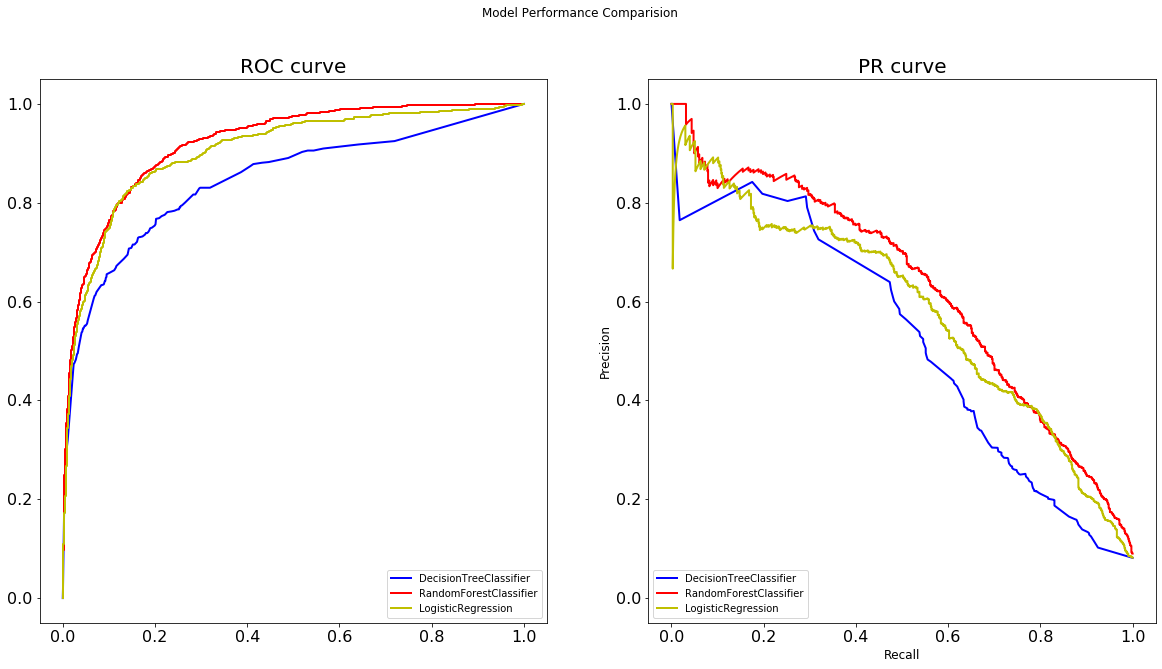

In [123]:
models_comparision([decision_tree, random_forest, logistic_regression], X_test, y_test)

From the above plots we can say that Random Forest performance is better

# 2) With PCA

In [124]:
pca = PCA(random_state=115)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=115,
    svd_solver='auto', tol=0.0, whiten=False)

In [125]:
var_cum = np.cumsum(pca.explained_variance_ratio_)

num_of_features = np.where(var_cum >= 0.95)[0][0]

In [126]:
Markdown("`{}` features explains `95%` of variance.".format(num_of_features))

`82` features explains `95%` of variance.

Scree Plot

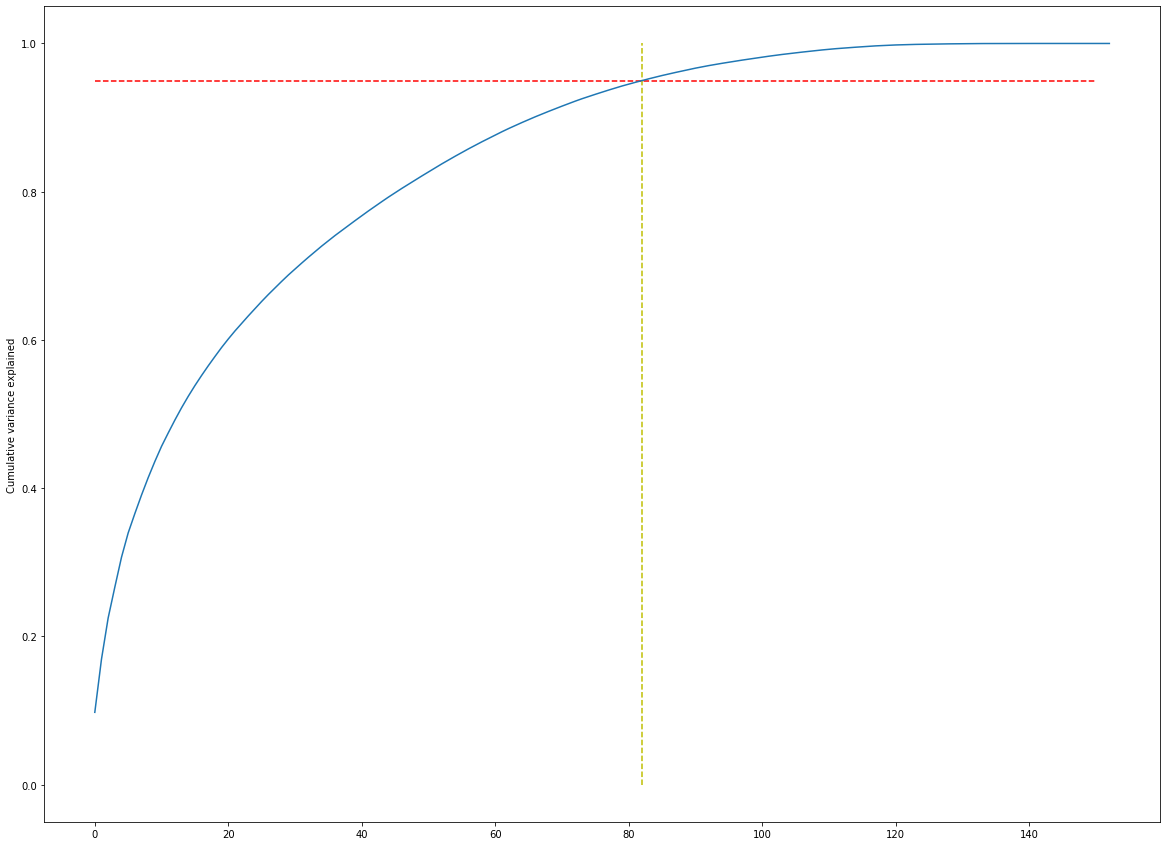

In [127]:
fig = plt.figure(figsize=[20,15])
plt.vlines(x=num_of_features, ymax=1, ymin=0, colors="y", linestyles="--")
plt.hlines(y=0.95, xmax=150, xmin=0, colors="r", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

Transforming and reducing train and test data

In [128]:
pca = PCA(n_components=num_of_features, random_state=115)
reduced_X_train = pca.fit_transform(X_train)
reduced_X_test = pca.transform(X_test)

In [129]:
Markdown("Size of Test data is `{}` and Size of Train dataset is `{}`.".format(reduced_X_test.shape, reduced_X_train.shape))

Size of Test data is `(8984, 82)` and Size of Train dataset is `(20962, 82)`.

a) Using Decision Tree
b) Using Random Forest
c) Using Logistic Regression

# a) Using Decision Tree

In [130]:
# HyperTuning
param_grid = {'max_depth': [4,6,8], 
              'min_samples_split':[80, 120, 150, 200],  
              'min_samples_leaf': [50, 100, 150],
              'criterion': ['gini', 'entropy'],
              'max_features':[20, 25, 30],
              'class_weight':['balanced', {0:1, 1:13}]
             }

stratified = StratifiedKFold(n_splits=3, shuffle=True, random_state=500)

decision_tree_1 = DecisionTreeClassifier(random_state=200)
dt_cv = GridSearchCV(decision_tree_1, param_grid, cv=stratified, scoring= 'f1', return_train_score=True, n_jobs = -1, verbose = 1)
dt_cv.fit(reduced_X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  3.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=500, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=200,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced', {0: 1, 1: 13}]

In [131]:
dt_cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 30,
 'min_samples_leaf': 50,
 'min_samples_split': 120}

In [132]:
decision_tree_1 = dt_cv.best_estimator_

Evaluate Model

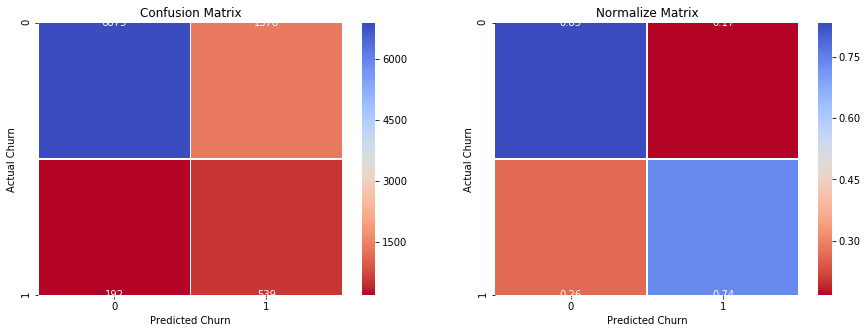

,0,1,accuracy,macro avg,weighted avg
precision,0.972831,0.281168,0.825245,0.627000,0.916553
recall,0.833030,0.737346,0.825245,0.785188,0.825245
f1-score,0.897520,0.407100,0.825245,0.652310,0.857616
support,8253.000000,731.000000,0.825245,8984.000000,8984.000000


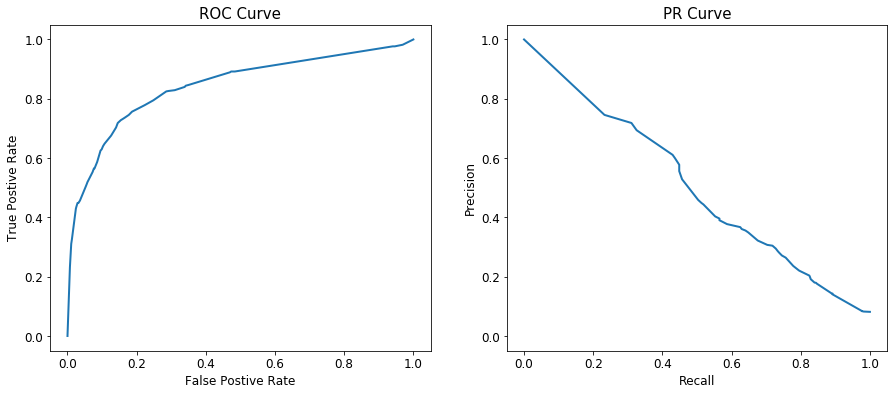

AUC score is `0.79`.

In [133]:
y_test_pred = decision_tree_1.predict(reduced_X_test)
confusion_matrix_plot(y_test, y_test_pred)

# ROC curve & PR curve
y_test_probability = decision_tree_1.predict_proba(reduced_X_test)[:,1]
plot_curves(y_test, y_test_probability)

Markdown("AUC score is `{}`.".format('%.2f' % roc_auc_score(y_test, y_test_pred)))

# b) Using Random Forest

In [134]:
# HyperTuning
param_grid = {'max_depth': [6, 8,12], 
              'min_samples_split':[100, 150, 200],  
              'min_samples_leaf': [80, 120, 150, 200],
              'n_estimators': [100, 200, 300],
              'criterion':['gini', 'entropy'],
              'class_weight':['balanced', {0:1, 1:13}]
             }

stratified = StratifiedKFold(n_splits=3, shuffle=True, random_state=500)
random_forest_1 = RandomForestClassifier(random_state=300,  max_features='auto')

# using random search instead of grid for better performance
rf_cv_1 = RandomizedSearchCV(random_forest_1, 
                             param_grid, 
                             n_iter = 20, 
                             cv=stratified, 
                             scoring= 'f1', 
                             return_train_score=True, 
                             n_jobs=-1, 
                             verbose =1, 
                             random_state= 200)
rf_cv_1.fit(reduced_X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=500, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_...
                                                    warm_start=False),
   

In [135]:
rf_cv_1.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 80,
 'max_depth': 6,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 13}}

In [136]:
random_forest_1 = rf_cv_1.best_estimator_

Evaluate Model

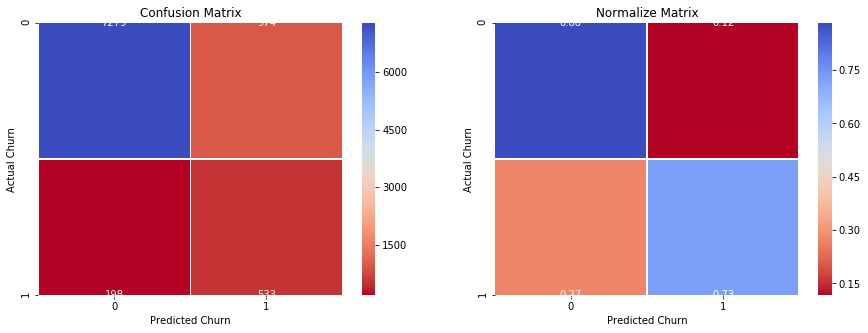

,0,1,accuracy,macro avg,weighted avg
precision,0.973519,0.353683,0.869546,0.663601,0.923085
recall,0.881982,0.729138,0.869546,0.805560,0.869546
f1-score,0.925493,0.476318,0.869546,0.700905,0.888945
support,8253.000000,731.000000,0.869546,8984.000000,8984.000000


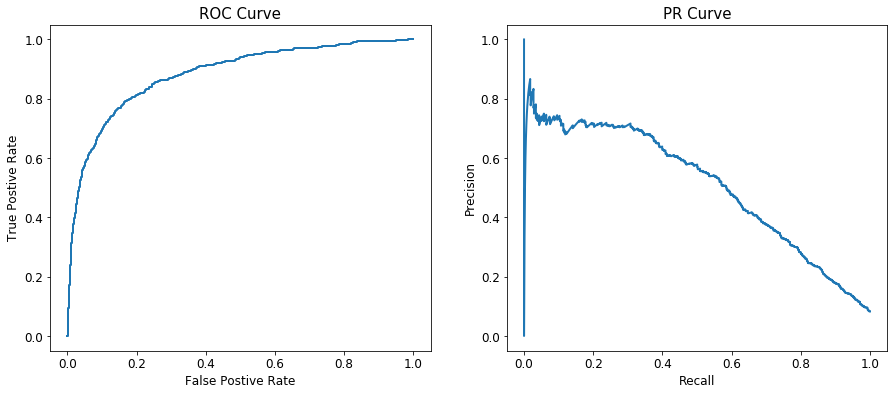

AUC score is `0.81`

In [137]:
y_test_pred = random_forest_1.predict(reduced_X_test)
confusion_matrix_plot(y_test, y_test_pred)

# ROC curve & PR curve
y_test_probability = random_forest_1.predict_proba(reduced_X_test)[:,1]
plot_curves(y_test, y_test_probability)

Markdown("AUC score is `{}`".format('%.2f' % roc_auc_score(y_test, y_test_pred)))

# c) Using Logistic Regression

In [138]:
# HyperTuning
stratified = StratifiedKFold(n_splits=4, shuffle=True, random_state=500)

param_grid= {'C': [ 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4]}

logistic_regression_1 = LogisticRegression(class_weight={0:1, 1:13}, penalty='l1',random_state=100, solver='saga')

lr1_cv = GridSearchCV(logistic_regression_1, param_grid, cv=stratified, scoring= 'f1', return_train_score=True, n_jobs=-1, verbose=1)
lr1_cv.fit(reduced_X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   46.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=500, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight={0: 1, 1: 13},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=100, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=1)

In [139]:
lr1_cv.best_params_

{'C': 0.05}

In [140]:
logistic_regression_1 = lr1_cv.best_estimator_

Evaluate Model

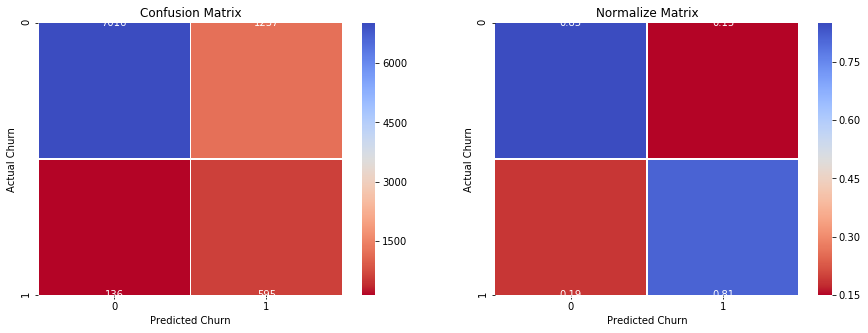

,0,1,accuracy,macro avg,weighted avg
precision,0.980984,0.324782,0.847173,0.652883,0.927591
recall,0.850115,0.813953,0.847173,0.832034,0.847173
f1-score,0.910873,0.464300,0.847173,0.687586,0.874537
support,8253.000000,731.000000,0.847173,8984.000000,8984.000000


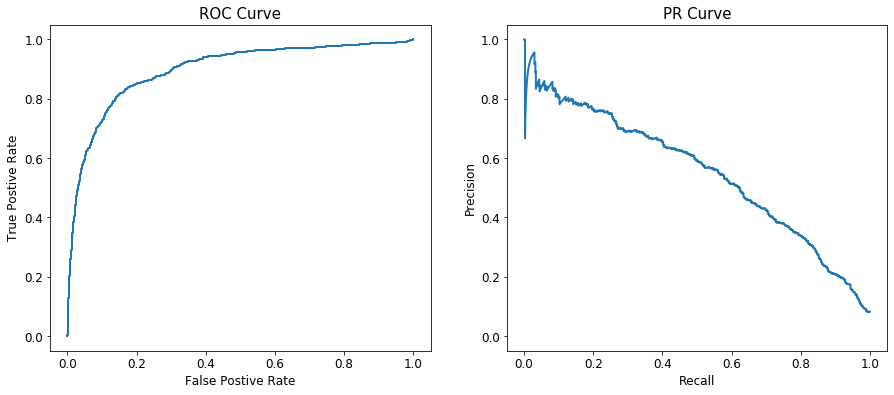

AUC score is `0.83`.

In [141]:
y_test_pred = logistic_regression_1.predict(reduced_X_test)
confusion_matrix_plot(y_test, y_test_pred)

# roc & pr curve
y_test_probability = logistic_regression_1.predict_proba(reduced_X_test)[:,1]
plot_curves(y_test, y_test_probability)

Markdown("AUC score is `{}`.".format('%.2f' % roc_auc_score(y_test, y_test_pred)))

# Model Comparision

,accuracy,f1,recall,precision,auc score
LogisticRegression,0.847173,0.4643,0.813953,0.324782,0.832034
RandomForestClassifier,0.869546,0.476318,0.729138,0.353683,0.80556
DecisionTreeClassifier,0.825245,0.4071,0.737346,0.281168,0.785188


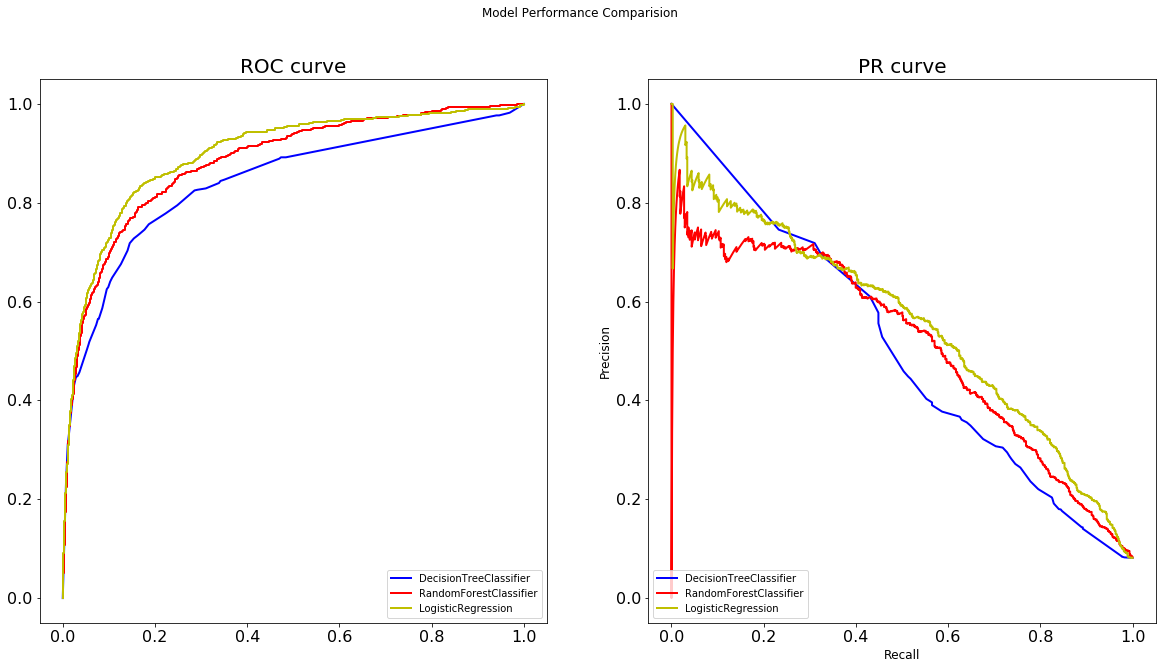

In [142]:
models_comparision([decision_tree_1, random_forest_1,logistic_regression_1], reduced_X_test, y_test)

From the above plots we can say that Logistic Regression is performing well for classification using PCA.

# Summary

1) Without PCA , we saw that the Random Forrest Classifier is performing well.
2) With PCA, we saw that the Logistic Regression Classifier is performing well.

# References:

1) https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b
2) https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html
3) https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
4) https://indianaiproduction.com/seaborn-heatmap/
5) https://chartio.com/learn/charts/what-is-a-scatter-plot/